## Mask Market Analysis

In [1]:
%config Completer.use_jedi = False

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import pytz
from pytz import timezone
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from textblob import Word
from textblob import TextBlob
!pip install seaborn --upgrade

[nltk_data] Downloading package stopwords to /Users/Mo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Road Map Walkthrough

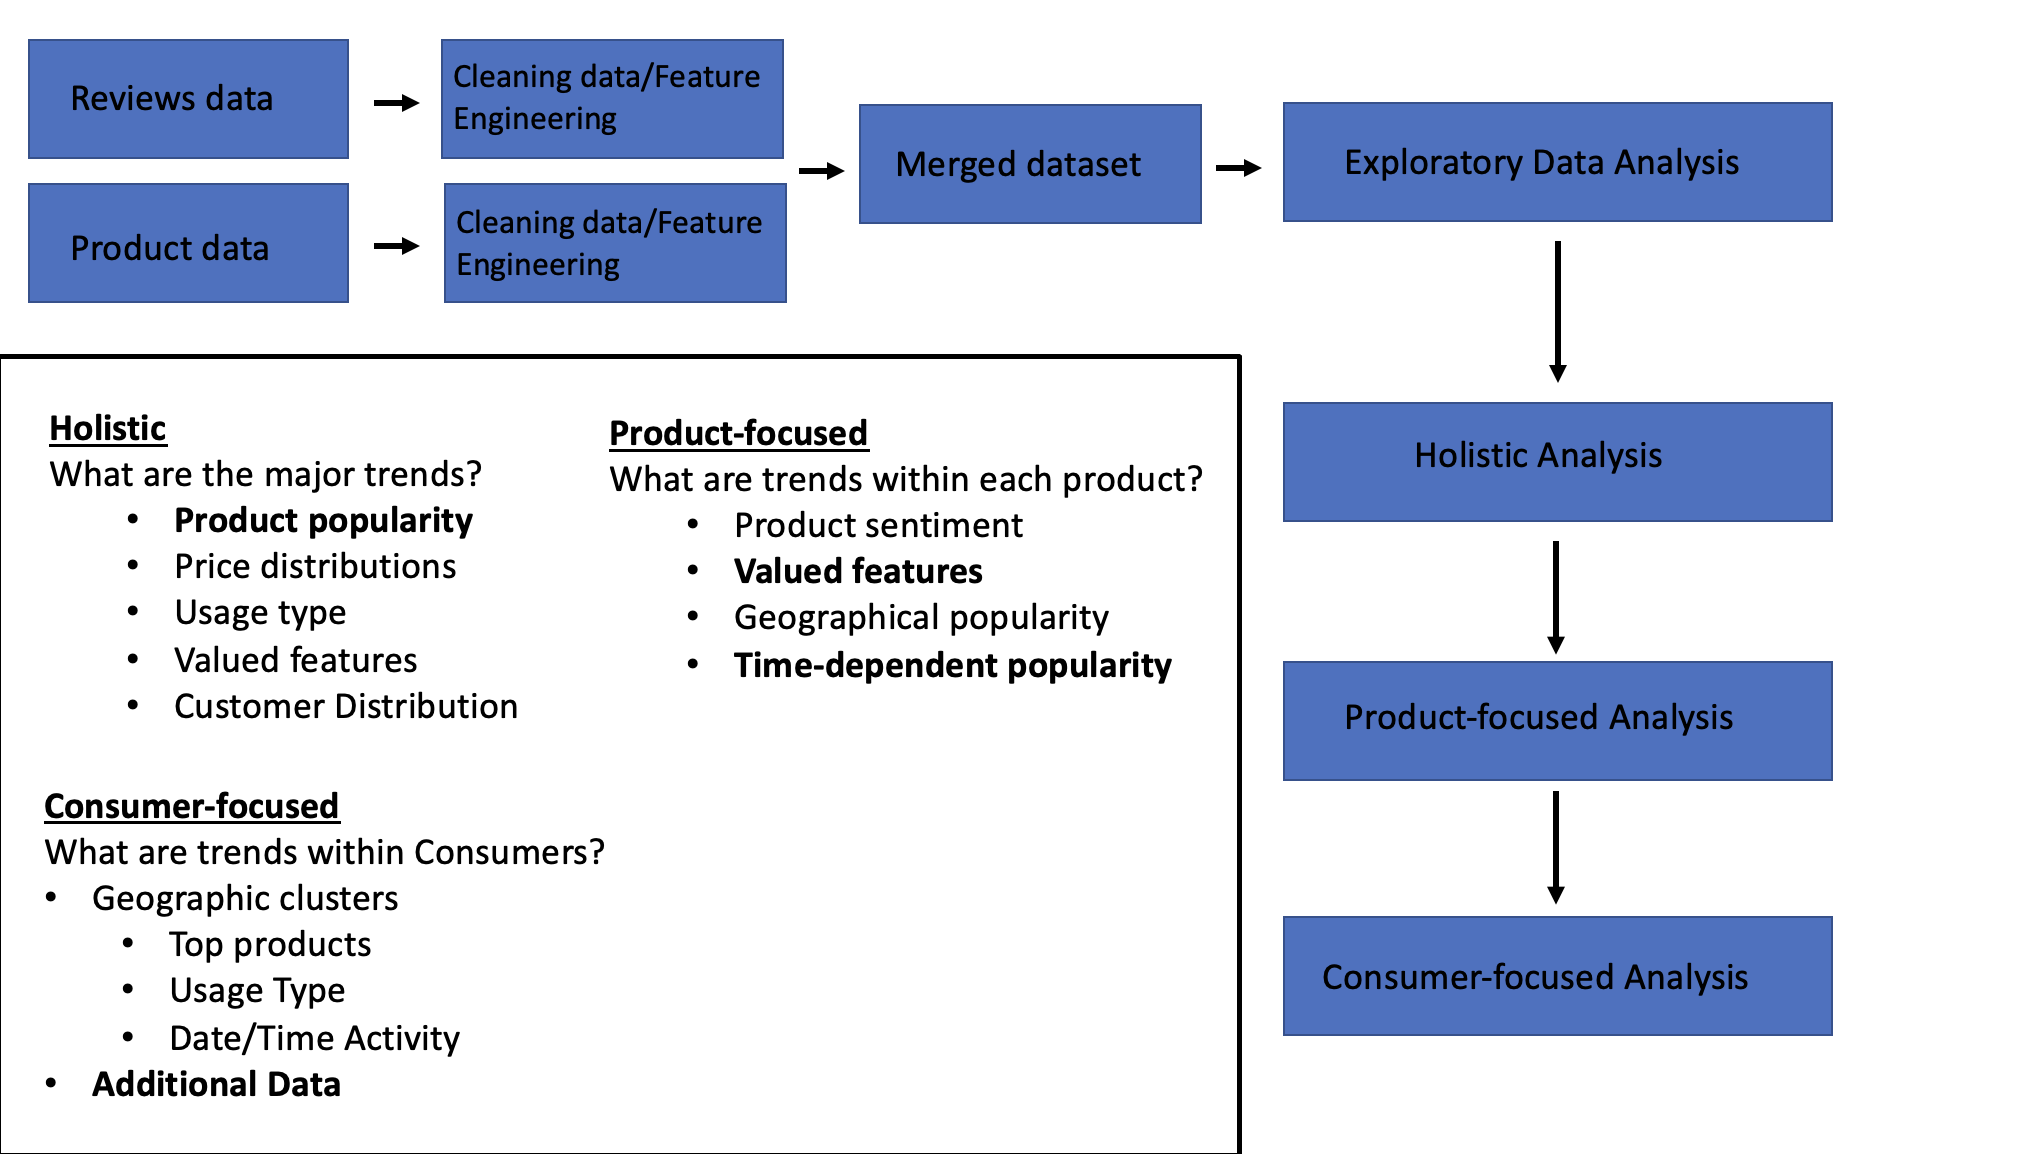

In [25]:
# load datasets

product_df = pd.read_csv("products.tsv", sep='\t')
review_df = pd.read_csv("reviews.tsv", sep='\t')

### Products

In [4]:
product_df.head() # peek data

product_id                                       product_name  \
0      103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1      101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2      101955  SunJoy, KN95, Professional Protective Disposab...   
3      103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4      102734        Zidian, Disposable Protective Mask, 50 Pack   

   product_price price_currency       product_availability  \
0           2.95            AUD  http://schema.org/InStock   
1           2.95            AUD  http://schema.org/InStock   
2           8.86            AUD  http://schema.org/InStock   
3           6.85            AUD  http://schema.org/InStock   
4          15.35            AUD  http://schema.org/InStock   

                                         product_url  \
0  https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1  https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2  https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4  https://au.iherb.com/pr/Zidian-Disposable-Prot...   

                                     source_url  
0  https://au.iherb.com/c/protective-face-masks  
1  https://au.iherb.com/c/protective-face-masks  
2  https://au.iherb.com/c/protective-face-masks  
3  https://au.iherb.com/c/protective-face-masks  
4  https://au.iherb.com/c/protective-face-masks

In [5]:
product_df.product_url.unique() # look up more info on variables through url

array(['https://au.iherb.com/pr/Hwipure-Disposable-KF94-N95-KN95-FFP2-Mask-1-Mask/103205',
       'https://au.iherb.com/pr/HIGUARD-Disposable-KF94-N95-KN95-FFP2-Mask-1-Mask/101774',
       'https://au.iherb.com/pr/SunJoy-KN95-Professional-Protective-Disposable-Face-Mask-10-Pack/101955',
       'https://au.iherb.com/pr/Lozperi-Copper-Mask-Adult-Black-1-Mask/103838',
       'https://au.iherb.com/pr/Zidian-Disposable-Protective-Mask-50-Pack/102734',
       'https://au.iherb.com/pr/La-Hauteur-Disposable-KF94-N95-KN95-FFP2-Mask-1-Mask/100837',
       'https://au.iherb.com/pr/YJ-Corporation-Disposable-KF94-Mask-for-Kids-1-Mask/100840',
       'https://au.iherb.com/pr/Hwipure-Disposable-KF94-N95-KN95-FFP2-Mask-25-Masks/103204',
       'https://au.iherb.com/pr/Lozperi-Copper-Mask-Adult-Gray-1-Mask/103840',
       'https://au.iherb.com/pr/Puritas-10-Days-Mask-Large-3-Pack/103743',
       'https://au.iherb.com/pr/Dr-Puri-Disposable-KF94-N95-KN95-FFP2-Mask-20-Masks/102522',
       'https://au.ihe

In [6]:
print(product_df.dtypes) # checking dtypes

product_id                int64
product_name             object
product_price           float64
price_currency           object
product_availability     object
product_url              object
source_url               object
dtype: object


##### product price has a wide distribution with a mean of about 17 and std deviation of 15.5 so there is alot of variation when it comes to price

In [7]:
product_df.describe() # products statistics

product_id  product_price
count      27.000000      27.000000
mean   102093.888889      16.969259
std      1499.395964      15.505124
min     99829.000000       2.950000
25%    100838.000000       6.260000
50%    101955.000000       8.860000
75%    103790.500000      22.440000
max    104023.000000      50.190000

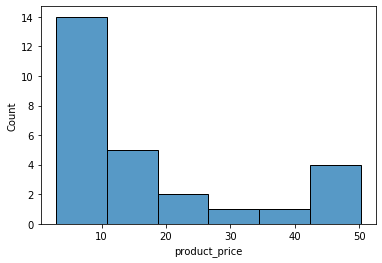

In [8]:
# visualizing product price distribution
sns.histplot(data=product_df, x="product_price")

Lets look at availability of the products and see if that has any affect on price.
First we have t oconvert the 'availability' column to it say either in stock our out of stock.

In [9]:
# clean up availability column
products_df = product_df.loc[product_df['product_availability'].str.contains('InStock'), 'product_availability'] = 'In Stock'

Break into list of products_name into categories of color, mask-type, disposable/reusable,etc.

In [10]:
product_df = product_df[['product_id',	'product_name',	'product_price', 'price_currency', 'product_availability']]
display(product_df)

product_id                                       product_name  \
0       103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1       101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2       101955  SunJoy, KN95, Professional Protective Disposab...   
3       103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4       102734        Zidian, Disposable Protective Mask, 50 Pack   
5       100837  La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2...   
6       100840  YJ Corporation, Disposable KF94 ( N95 / KN95/ ...   
7       103204  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
8       103840          Lozperi, Copper Mask, Adult, Gray, 1 Mask   
9       103743               Puritas, 10 Days Mask, Large, 3 Pack   
10      102522  Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 )...   
11      103839          Lozperi, Copper Mask, Adult, Dot, 1 Count   
12      104023     Kosette, PM 2.5 Replaceable Filter, 24 Filters   
13      101692  Kitsch, 100% Cotton Reusable Face Masks, Neutr...   
14      100839  One Fine Day, Disposable KF94 ( N95 / KN95/ FF...   
15      100237  Kitsch, 100% Cotton Reuseable Face Masks, Leop...   
16      103841          Lozperi, Copper Mask, Kids, Black, 1 Mask   
17       99830  Kosette, Nano Reusable Face Protection Mask, M...   
18      104022  Kosette, Fashion Mask with Filter Pocket,  3 M...   
19       99829  Kosette, Nano Reusable Face Protection Mask, L...   
20      103842          Lozperi, Copper Mask, Kids, Gray, 1 Count   
21      102455            Now Foods, Face Mask, Grey, S-M, 1 Mask   
22      101691  Kitsch, 100% Cotton Reuseable Face Masks, Blus...   
23      100541       Tony Moly, CTT KN95 Respirator Mask, 5 Count   
24      100099  Luseta Beauty, Disposable Protection Face Mask...   
25      100234  Luseta Beauty, Disposable Protection Face Mask...   
26      101029  Landsberg, 3 Ply Disposable Protective Face Ma...   

    product_price price_currency product_availability  
0            2.95            AUD             In Stock  
1            2.95            AUD             In Stock  
2            8.86            AUD             In Stock  
3            6.85            AUD             In Stock  
4           15.35            AUD             In Stock  
5            5.61            AUD             In Stock  
6            3.93            AUD             In Stock  
7           50.19            AUD             In Stock  
8            6.85            AUD             In Stock  
9            6.61            AUD             In Stock  
10          47.24            AUD             In Stock  
11           6.85            AUD             In Stock  
12           5.91            AUD             In Stock  
13          17.72            AUD             In Stock  
14           4.49            AUD             In Stock  
15          17.72            AUD             In Stock  
16           6.85            AUD             In Stock  
17          22.44            AUD             In Stock  
18          11.81            AUD             In Stock  
19          22.44            AUD             In Stock  
20           6.85            AUD             In Stock  
21           2.95            AUD             In Stock  
22          17.72            AUD             In Stock  
23          26.57            AUD             In Stock  
24          49.61            AUD             In Stock  
25          44.31            AUD             In Stock  
26          36.54            AUD             In Stock

In [11]:
# def str_to_list(dataframe_col):
#     new_col = dataframe_col.strip('][').split(', ')

In [12]:
# create list of seperate items for each product name
mask_list = []
for i in range(len(product_df)):
    mask_list.append(product_df.product_name[i].strip('][').split(', '))
    product_df.at[i,'product_name'] = mask_list[i]

In [13]:
# create seperate feature variables from product name description in order to populate them
product_df[['Brand','MaskType','Size','ColorPattern','MaskCount',]] = np.nan

We need to go through list of items in 'product_name' and append each one to it's appropriate column.
- First index is consistently brand name
- second index is consistently mask or filter name
- third index can be mask count, size, or color/pattern

In [14]:
product_df.Brand = product_df.product_name.str[0] # first index consistent
product_df.MaskType = product_df.product_name.str[1] # second index consistent


product_df.MaskCount = product_df.product_name.str[-1] # last index consistent

# Middle indices will have to be filtered through keywords on color/pattern and size
product_df['col1'] = product_df.product_name.str[2]  # column has duplicated in column already consistently filled
product_df['col2'] = product_df.product_name.str[3] # column has duplicated in column already consistently filled

In [15]:
product_df

product_id                                       product_name  \
0       103205  [Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )...   
1       101774  [HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 )...   
2       101955  [SunJoy, KN95, Professional Protective Disposa...   
3       103838       [Lozperi, Copper Mask, Adult, Black, 1 Mask]   
4       102734      [Zidian, Disposable Protective Mask, 50 Pack]   
5       100837  [La Hauteur, Disposable KF94 ( N95 / KN95/ FFP...   
6       100840  [YJ Corporation, Disposable KF94 ( N95 / KN95/...   
7       103204  [Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )...   
8       103840        [Lozperi, Copper Mask, Adult, Gray, 1 Mask]   
9       103743             [Puritas, 10 Days Mask, Large, 3 Pack]   
10      102522  [Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 ...   
11      103839        [Lozperi, Copper Mask, Adult, Dot, 1 Count]   
12      104023   [Kosette, PM 2.5 Replaceable Filter, 24 Filters]   
13      101692  [Kitsch, 100% Cotton Reusable Face Masks, Neut...   
14      100839  [One Fine Day, Disposable KF94 ( N95 / KN95/ F...   
15      100237  [Kitsch, 100% Cotton Reuseable Face Masks, Leo...   
16      103841        [Lozperi, Copper Mask, Kids, Black, 1 Mask]   
17       99830  [Kosette, Nano Reusable Face Protection Mask, ...   
18      104022  [Kosette, Fashion Mask with Filter Pocket,  3 ...   
19       99829  [Kosette, Nano Reusable Face Protection Mask, ...   
20      103842        [Lozperi, Copper Mask, Kids, Gray, 1 Count]   
21      102455          [Now Foods, Face Mask, Grey, S-M, 1 Mask]   
22      101691  [Kitsch, 100% Cotton Reuseable Face Masks, Blu...   
23      100541     [Tony Moly, CTT KN95 Respirator Mask, 5 Count]   
24      100099  [Luseta Beauty, Disposable Protection Face Mas...   
25      100234  [Luseta Beauty, Disposable Protection Face Mas...   
26      101029  [Landsberg, 3 Ply Disposable Protective Face M...   

    product_price price_currency product_availability           Brand  \
0            2.95            AUD             In Stock         Hwipure   
1            2.95            AUD             In Stock         HIGUARD   
2            8.86            AUD             In Stock          SunJoy   
3            6.85            AUD             In Stock         Lozperi   
4           15.35            AUD             In Stock          Zidian   
5            5.61            AUD             In Stock      La Hauteur   
6            3.93            AUD             In Stock  YJ Corporation   
7           50.19            AUD             In Stock         Hwipure   
8            6.85            AUD             In Stock         Lozperi   
9            6.61            AUD             In Stock         Puritas   
10          47.24            AUD             In Stock        Dr. Puri   
11           6.85            AUD             In Stock         Lozperi   
12           5.91            AUD             In Stock         Kosette   
13          17.72            AUD             In Stock          Kitsch   
14           4.49            AUD             In Stock    One Fine Day   
15          17.72            AUD             In Stock          Kitsch   
16           6.85            AUD             In Stock         Lozperi   
17          22.44            AUD             In Stock         Kosette   
18          11.81            AUD             In Stock         Kosette   
19          22.44            AUD             In Stock         Kosette   
20           6.85            AUD             In Stock         Lozperi   
21           2.95            AUD             In Stock       Now Foods   
22          17.72            AUD             In Stock          Kitsch   
23          26.57            AUD             In Stock       Tony Moly   
24          49.61            AUD             In Stock   Luseta Beauty   
25          44.31            AUD             In Stock   Luseta Beauty   
26          36.54            AUD             In Stock       Landsberg   

                          

In [16]:
product_df = product_df.sort_values(by=['Brand']).reset_index(drop=True)

In [17]:
product_df

product_id                                       product_name  \
0       102522  [Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 ...   
1       101774  [HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 )...   
2       103205  [Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )...   
3       103204  [Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )...   
4       101691  [Kitsch, 100% Cotton Reuseable Face Masks, Blu...   
5       100237  [Kitsch, 100% Cotton Reuseable Face Masks, Leo...   
6       101692  [Kitsch, 100% Cotton Reusable Face Masks, Neut...   
7        99829  [Kosette, Nano Reusable Face Protection Mask, ...   
8       104022  [Kosette, Fashion Mask with Filter Pocket,  3 ...   
9        99830  [Kosette, Nano Reusable Face Protection Mask, ...   
10      104023   [Kosette, PM 2.5 Replaceable Filter, 24 Filters]   
11      100837  [La Hauteur, Disposable KF94 ( N95 / KN95/ FFP...   
12      101029  [Landsberg, 3 Ply Disposable Protective Face M...   
13      103838       [Lozperi, Copper Mask, Adult, Black, 1 Mask]   
14      103840        [Lozperi, Copper Mask, Adult, Gray, 1 Mask]   
15      103842        [Lozperi, Copper Mask, Kids, Gray, 1 Count]   
16      103839        [Lozperi, Copper Mask, Adult, Dot, 1 Count]   
17      103841        [Lozperi, Copper Mask, Kids, Black, 1 Mask]   
18      100234  [Luseta Beauty, Disposable Protection Face Mas...   
19      100099  [Luseta Beauty, Disposable Protection Face Mas...   
20      102455          [Now Foods, Face Mask, Grey, S-M, 1 Mask]   
21      100839  [One Fine Day, Disposable KF94 ( N95 / KN95/ F...   
22      103743             [Puritas, 10 Days Mask, Large, 3 Pack]   
23      101955  [SunJoy, KN95, Professional Protective Disposa...   
24      100541     [Tony Moly, CTT KN95 Respirator Mask, 5 Count]   
25      100840  [YJ Corporation, Disposable KF94 ( N95 / KN95/...   
26      102734      [Zidian, Disposable Protective Mask, 50 Pack]   

    product_price price_currency product_availability           Brand  \
0           47.24            AUD             In Stock        Dr. Puri   
1            2.95            AUD             In Stock         HIGUARD   
2            2.95            AUD             In Stock         Hwipure   
3           50.19            AUD             In Stock         Hwipure   
4           17.72            AUD             In Stock          Kitsch   
5           17.72            AUD             In Stock          Kitsch   
6           17.72            AUD             In Stock          Kitsch   
7           22.44            AUD             In Stock         Kosette   
8           11.81            AUD             In Stock         Kosette   
9           22.44            AUD             In Stock         Kosette   
10           5.91            AUD             In Stock         Kosette   
11           5.61            AUD             In Stock      La Hauteur   
12          36.54            AUD             In Stock       Landsberg   
13           6.85            AUD             In Stock         Lozperi   
14           6.85            AUD             In Stock         Lozperi   
15           6.85            AUD             In Stock         Lozperi   
16           6.85            AUD             In Stock         Lozperi   
17           6.85            AUD             In Stock         Lozperi   
18          44.31            AUD             In Stock   Luseta Beauty   
19          49.61            AUD             In Stock   Luseta Beauty   
20           2.95            AUD             In Stock       Now Foods   
21           4.49            AUD             In Stock    One Fine Day   
22           6.61            AUD             In Stock         Puritas   
23           8.86            AUD             In Stock          SunJoy   
24          26.57            AUD             In Stock       Tony Moly   
25           3.93            AUD             In Stock  YJ Corporation   
26          15.35            AUD             In Stock          Zidian   

                          

In [18]:
# Manually checking colors and sizes
print('col1: ',product_df['col1'].unique())
print()
print('col2: ',product_df['col2'].unique())

col1:  ['20 Masks' '1 Mask' ' 25 Masks' 'Blush' 'Leopard' 'Neutral' 'Large'
 ' 3 Masks' 'Medium' '24 Filters' '50 Pack' 'Adult' 'Kids' 'Grey'
 'Professional Protective Disposable Face Mask' '5 Count' 'for Kids']

col2:  [nan '3 Pack' '1 Mask' 'Black' 'Gray' 'Dot' 'S-M' '10 Pack']


In [19]:
product_df['col2'] = product_df['col2'].fillna('')

In [20]:
# Search size key words in columns and extarct index to paste on appropriate column
              
size_keys = '|'.join(["Kids", "S-M","Medium","Adult","Large"]) # types of sizes
color_keys = '|'.join(['Grey','Blush','Neutral','Leopard','Dot','Black']) # types of colors

# thw two columns have diferent mix of size/colors
# go through each column and extract color and size items appropriatley
col1_size = product_df.index[product_df['col1'].str.contains(size_keys)] 
col2_size = product_df.index[product_df['col2'].str.contains(size_keys)]

col1_color = product_df.index[product_df['col1'].str.contains(color_keys)]
col2_color = product_df.index[product_df['col2'].str.contains(color_keys)]

print('Size indices from col1 ',product_df.index[product_df['col1'].str.contains(size_keys)])
print('Size index from col2: ', product_df.index[product_df['col2'].str.contains(size_keys)])
print()
print()
print('Color index from col1: ',product_df.index[product_df['col1'].str.contains(color_keys)])
print('Color index from col2: ', product_df.index[product_df['col2'].str.contains(color_keys)])

Size indices from col1  Int64Index([7, 9, 13, 14, 15, 16, 17, 22, 25], dtype='int64')
Size index from col2:  Int64Index([20], dtype='int64')


Color index from col1:  Int64Index([4, 5, 6, 20], dtype='int64')
Color index from col2:  Int64Index([13, 16, 17], dtype='int64')


In [21]:
temp_df = product_df.copy() # test df

In [22]:
size_indices = [3, 6, 8, 9, 11, 17, 19, 20, 21] # product_df index list with sizes
color_indices = [13, 15, 21, 22, 3, 11, 16] # product_df index list with colors

# join colmns with just sizes together into a single 'Size' column
temp_df['Size1'] = temp_df['col1'].loc[col1_size]
temp_df['Size2'] = temp_df['col2'].loc[col2_size]
temp_df['Size'] = pd.concat([temp_df['Size1'],temp_df['Size2']], axis = 1)

# join columns with just colors together into a single 'ColorPattern' column
temp_df['Color1'] = temp_df['col1'].loc[col1_color]
temp_df['Color2'] = temp_df['col2'].loc[col2_color]
temp_df['ColorPattern'] = pd.concat([temp_df['Color1'],temp_df['Color2']], axis = 1)

In [23]:
product_df = temp_df

In [24]:
# delete extra columns
del product_df['Color1']
del product_df['Color2']
del product_df['Size1']
del product_df['Size2']
del product_df['col1']
del product_df['col2']


In [25]:
product_df

product_id                                       product_name  \
0       102522  [Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 ...   
1       101774  [HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 )...   
2       103205  [Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )...   
3       103204  [Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )...   
4       101691  [Kitsch, 100% Cotton Reuseable Face Masks, Blu...   
5       100237  [Kitsch, 100% Cotton Reuseable Face Masks, Leo...   
6       101692  [Kitsch, 100% Cotton Reusable Face Masks, Neut...   
7        99829  [Kosette, Nano Reusable Face Protection Mask, ...   
8       104022  [Kosette, Fashion Mask with Filter Pocket,  3 ...   
9        99830  [Kosette, Nano Reusable Face Protection Mask, ...   
10      104023   [Kosette, PM 2.5 Replaceable Filter, 24 Filters]   
11      100837  [La Hauteur, Disposable KF94 ( N95 / KN95/ FFP...   
12      101029  [Landsberg, 3 Ply Disposable Protective Face M...   
13      103838       [Lozperi, Copper Mask, Adult, Black, 1 Mask]   
14      103840        [Lozperi, Copper Mask, Adult, Gray, 1 Mask]   
15      103842        [Lozperi, Copper Mask, Kids, Gray, 1 Count]   
16      103839        [Lozperi, Copper Mask, Adult, Dot, 1 Count]   
17      103841        [Lozperi, Copper Mask, Kids, Black, 1 Mask]   
18      100234  [Luseta Beauty, Disposable Protection Face Mas...   
19      100099  [Luseta Beauty, Disposable Protection Face Mas...   
20      102455          [Now Foods, Face Mask, Grey, S-M, 1 Mask]   
21      100839  [One Fine Day, Disposable KF94 ( N95 / KN95/ F...   
22      103743             [Puritas, 10 Days Mask, Large, 3 Pack]   
23      101955  [SunJoy, KN95, Professional Protective Disposa...   
24      100541     [Tony Moly, CTT KN95 Respirator Mask, 5 Count]   
25      100840  [YJ Corporation, Disposable KF94 ( N95 / KN95/...   
26      102734      [Zidian, Disposable Protective Mask, 50 Pack]   

    product_price price_currency product_availability           Brand  \
0           47.24            AUD             In Stock        Dr. Puri   
1            2.95            AUD             In Stock         HIGUARD   
2            2.95            AUD             In Stock         Hwipure   
3           50.19            AUD             In Stock         Hwipure   
4           17.72            AUD             In Stock          Kitsch   
5           17.72            AUD             In Stock          Kitsch   
6           17.72            AUD             In Stock          Kitsch   
7           22.44            AUD             In Stock         Kosette   
8           11.81            AUD             In Stock         Kosette   
9           22.44            AUD             In Stock         Kosette   
10           5.91            AUD             In Stock         Kosette   
11           5.61            AUD             In Stock      La Hauteur   
12          36.54            AUD             In Stock       Landsberg   
13           6.85            AUD             In Stock         Lozperi   
14           6.85            AUD             In Stock         Lozperi   
15           6.85            AUD             In Stock         Lozperi   
16           6.85            AUD             In Stock         Lozperi   
17           6.85            AUD             In Stock         Lozperi   
18          44.31            AUD             In Stock   Luseta Beauty   
19          49.61            AUD             In Stock   Luseta Beauty   
20           2.95            AUD             In Stock       Now Foods   
21           4.49            AUD             In Stock    One Fine Day   
22           6.61            AUD             In Stock         Puritas   
23           8.86            AUD             In Stock          SunJoy   
24          26.57            AUD             In Stock       Tony Moly   
25           3.93            AUD             In Stock  YJ Corporation   
26          15.35            AUD             In Stock          Zidian   

                          

In [26]:
# creating 'usage' type column
product_df['usage'] = product_df['MaskType']

#  identifying disposable masks
disp_mask = ['Disposable','CTT','KN95','10 Days']# disposable masks word keys
product_df.loc[product_df['MaskType'].str.contains('|'.join(disp_mask)), 'usage'] = 'Disposable'

# identifying reusable masks
reuse_mask = ['Cotton','Reusable','Copper','Fashion']#reusable mask word keys
product_df.loc[product_df['MaskType'].str.contains('|'.join(reuse_mask)), 'usage'] = 'Reusable'
product_df.loc[product_df['Brand'].str.contains('Now Foods'), 'usage'] = 'Reusable'

# mask filters
product_df.loc[product_df['MaskType'].str.contains('Replaceable Filter'), 'usage'] = 'Filter'
# fixing element name
product_df['MaskType'] = product_df['MaskType'].replace({'100% Cotton Reusable Face Masks': '100% Cotton Reuseable Face Masks'})


In [27]:
product_df = product_df.drop(['product_name'], axis = 1) # drop original column

In [28]:
product_df

product_id  product_price price_currency product_availability  \
0       102522          47.24            AUD             In Stock   
1       101774           2.95            AUD             In Stock   
2       103205           2.95            AUD             In Stock   
3       103204          50.19            AUD             In Stock   
4       101691          17.72            AUD             In Stock   
5       100237          17.72            AUD             In Stock   
6       101692          17.72            AUD             In Stock   
7        99829          22.44            AUD             In Stock   
8       104022          11.81            AUD             In Stock   
9        99830          22.44            AUD             In Stock   
10      104023           5.91            AUD             In Stock   
11      100837           5.61            AUD             In Stock   
12      101029          36.54            AUD             In Stock   
13      103838           6.85            AUD             In Stock   
14      103840           6.85            AUD             In Stock   
15      103842           6.85            AUD             In Stock   
16      103839           6.85            AUD             In Stock   
17      103841           6.85            AUD             In Stock   
18      100234          44.31            AUD             In Stock   
19      100099          49.61            AUD             In Stock   
20      102455           2.95            AUD             In Stock   
21      100839           4.49            AUD             In Stock   
22      103743           6.61            AUD             In Stock   
23      101955           8.86            AUD             In Stock   
24      100541          26.57            AUD             In Stock   
25      100840           3.93            AUD             In Stock   
26      102734          15.35            AUD             In Stock   

             Brand                                   MaskType      Size  \
0         Dr. Puri  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask       NaN   
1          HIGUARD  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask       NaN   
2          Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask       NaN   
3          Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask       NaN   
4           Kitsch           100% Cotton Reuseable Face Masks       NaN   
5           Kitsch           100% Cotton Reuseable Face Masks       NaN   
6           Kitsch           100% Cotton Reuseable Face Masks       NaN   
7          Kosette         Nano Reusable Face Protection Mask     Large   
8          Kosette            Fashion Mask with Filter Pocket       NaN   
9          Kosette         Nano Reusable Face Protection Mask    Medium   
10         Kosette                  PM 2.5 Replaceable Filter       NaN   
11      La Hauteur  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask       NaN   
12       Landsberg      3 Ply Disposable Protective Face Mask       NaN   
13         Lozperi                                Copper Mask     Adult   
14         Lozperi                                Copper Mask     Adult   
15         Lozperi                                Copper Mask      Kids   
16         Lozperi                                Copper Mask     Adult   
17         Lozperi                                Copper Mask      Kids   
18   Luseta Beauty            Disposable Protection Face Mask       NaN   
19   Luseta Beauty            Disposable Protection Face Mask       NaN   
20       Now Foods                                  Face Mask       NaN   
21    One Fine Day  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask       NaN   
22         Puritas                               10 Days Mask     Large   
23          SunJoy                                       KN95       NaN   
24       Tony Moly                   CTT KN95 Respirator Mask       NaN   
25  YJ Corporation  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask  for Kids   
26          Zidian                 Disposable 

In [29]:
product_df.usage.unique()

array(['Disposable', 'Reusable', 'Filter'], dtype=object)

## Reviews data

In [18]:
review_df.head() # peek data

abuseCount customerNickname  helpfulNo  helpfulYes  \
0           0   iHerb Customer          0           6   
1           0   iHerb Customer          0           0   
2           0   iHerb Customer          0           0   
3           0     InnaIgorevna          0           0   
4           0   iHerb Customer          0           0   

                                     id  imagesCount languageCode  \
0  05c2b17e-c28d-4792-930d-27e787d8d4ad            1        en-US   
1  80e44af8-2edf-4b81-a80a-7e7888d03cc0            0        ru-RU   
2  9a76e047-21e4-4da3-8b50-9d2396519b6b            0        en-US   
3  2890ac54-8707-418e-be3e-8d46231e3672            0        ru-RU   
4  9db33354-0457-4efa-bc9c-b5f7ee0eff31            0        ru-RU   

                 postedDate  productId  profileInfo.ugcSummary.answerCount  \
0  2021-01-27T09:04:10.569Z     103839                                 0.0   
1  2021-02-07T00:56:39.055Z     103839                                 0.0   
2  2021-02-06T21:40:02.886Z     103839                                 0.0   
3  2021-02-05T16:29:28.906Z     103839                                 0.0   
4  2021-02-05T09:43:42.367Z     103839                                 0.0   

   profileInfo.ugcSummary.reviewCount  ratingValue  \
0                                34.0           50   
1                                37.0           50   
2                                 3.0           40   
3                                16.0           40   
4                                19.0           50   

                                          reviewText             reviewTitle  \
0  The mask quality and the color is good. It fit...  Dotted Pattern Is Nice   
1            Внуку очень понравилось. Удобная маска.              Прекрасно!   
2              Easy to put on & comfortable to wear.                    Good   
3  Тонкая, приятная к телу маска. Расцветка тоже ...                  Хорошо   
4  Отличная маска! Мне подошла идеально. Слегка е...              Прекрасно!   

   reviewed         score languageCode.1  \
0      True  1.614071e+09          en-US   
1     False  1.612659e+09          ru-RU   
2     False  1.612648e+09          en-US   
3     False  1.612543e+09          ru-RU   
4     False  1.612518e+09          ru-RU   

                              translation.reviewText translation.reviewTitle  
0                                                NaN                     NaN  
1    The grandson really liked it. Comfortable mask.                   en-US  
2                                                NaN                     NaN  
3  A thin mask that is pleasant to the body. I li...                   en-US  
4  Great mask! It suited me perfectly. There is a...                   en-US

In [11]:
review_df.reviewText[40]

'Love it!! The only mask I can breathe with.'

In [31]:
review_df['customerNickname'].count() # number of reviews

3849

In [32]:
review_df = review_df.sort_values(by=['customerNickname','id']) # order by
#review_df.shape

In [33]:
print(len(review_df.id))
print(len(review_df.id.unique())) # check for duplicates

3849
3765


In [34]:
review_df = review_df.drop_duplicates() # drop duplicates
len(review_df.drop_duplicates()) # verify

3765

In [35]:
#review_df.head()

In [36]:
# renaming columns
review_df = review_df.rename(columns={'profileInfo.ugcSummary.answerCount': 'Answer Count', 
                                      'profileInfo.ugcSummary.reviewCount': 'Review Count',})

In [37]:
review_df.dtypes

abuseCount                   int64
customerNickname            object
helpfulNo                    int64
helpfulYes                   int64
id                          object
imagesCount                  int64
languageCode                object
postedDate                  object
productId                    int64
Answer Count               float64
Review Count               float64
ratingValue                  int64
reviewText                  object
reviewTitle                 object
reviewed                      bool
score                      float64
languageCode.1              object
translation.reviewText      object
translation.reviewTitle     object
dtype: object

### Data quality verification

In [38]:
print('product_df size: ', product_df.shape)
print('review_df size: ', review_df.shape)


product_df size:  (27, 10)
review_df size:  (3765, 19)


 Looks like there is alot more reviews than there are products which makes sense. Let's check if there are any reviws for products that are not listed in our products dataframe

In [39]:
prod_id1 = product_df['product_id'].unique()
prod_id2 = review_df['productId'].unique()
print('products from product_df = ',prod_id1.size)
print('products from review_df = ',prod_id2.size)
print('')
print('total overalapping values: ',np.intersect1d(prod_id1, prod_id2).size) # checking overlapping values between the two arrays

products from product_df =  27
products from review_df =  27

total overalapping values:  27


In [27]:
# join english and translated texts into a single column
# using .fillna to insert NaN values with the original english reviews at their respective indices
review_df['translation.reviewText'] = review_df['translation.reviewText'].fillna(review_df.pop('reviewText'))

# rename column to review text
review_df = review_df.rename(columns = {'translation.reviewText': 'review text'})

In [20]:
review_df.head()

abuseCount customerNickname  helpfulNo  helpfulYes  \
0           0   iHerb Customer          0           6   
1           0   iHerb Customer          0           0   
2           0   iHerb Customer          0           0   
3           0     InnaIgorevna          0           0   
4           0   iHerb Customer          0           0   

                                     id  imagesCount languageCode  \
0  05c2b17e-c28d-4792-930d-27e787d8d4ad            1        en-US   
1  80e44af8-2edf-4b81-a80a-7e7888d03cc0            0        ru-RU   
2  9a76e047-21e4-4da3-8b50-9d2396519b6b            0        en-US   
3  2890ac54-8707-418e-be3e-8d46231e3672            0        ru-RU   
4  9db33354-0457-4efa-bc9c-b5f7ee0eff31            0        ru-RU   

                 postedDate  productId  profileInfo.ugcSummary.answerCount  \
0  2021-01-27T09:04:10.569Z     103839                                 0.0   
1  2021-02-07T00:56:39.055Z     103839                                 0.0   
2  2021-02-06T21:40:02.886Z     103839                                 0.0   
3  2021-02-05T16:29:28.906Z     103839                                 0.0   
4  2021-02-05T09:43:42.367Z     103839                                 0.0   

   profileInfo.ugcSummary.reviewCount  ratingValue             reviewTitle  \
0                                34.0           50  Dotted Pattern Is Nice   
1                                37.0           50              Прекрасно!   
2                                 3.0           40                    Good   
3                                16.0           40                  Хорошо   
4                                19.0           50              Прекрасно!   

   reviewed         score languageCode.1  \
0      True  1.614071e+09          en-US   
1     False  1.612659e+09          ru-RU   
2     False  1.612648e+09          en-US   
3     False  1.612543e+09          ru-RU   
4     False  1.612518e+09          ru-RU   

                                         review text translation.reviewTitle  
0  The mask quality and the color is good. It fit...                     NaN  
1    The grandson really liked it. Comfortable mask.                   en-US  
2              Easy to put on & comfortable to wear.                     NaN  
3  A thin mask that is pleasant to the body. I li...                   en-US  
4  Great mask! It suited me perfectly. There is a...                   en-US

### Questions about the data

- What are True/False values under 'reviewed'?
- what are the 'score' values? --> quality of review. Not sure what constitutes a quality review.  
- What are the conditions for 'abuseCount'

In [29]:
# word count
review_df['words'] = [len(x.split()) for x in review_df['review text'].tolist()]

In [30]:
# mean word count
review_df['words'].mean()

20.332813717848794

We will probably leave out the features mentioned above as it will be hard to interpret anything accuratley from them.

In [42]:
review_df.reviewed.value_counts()

False    2712
True     1053
Name: reviewed, dtype: int64

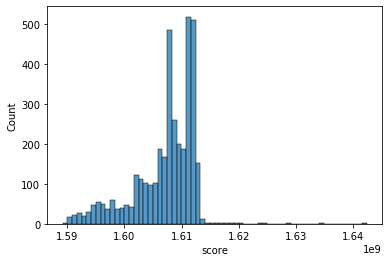

In [43]:
sns.histplot(data = review_df, x = review_df.score)

Could this be a sentiment score? Usually they are scaled -1,+1. the scoring range seems very weird. Could it be user score?
lets try and see what the ratings look like and maybe it will give us a better reasoning for this value

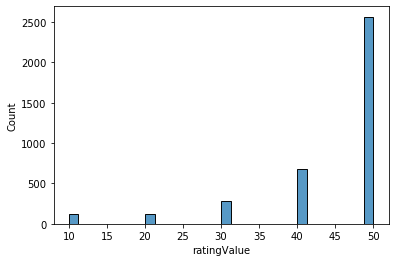

In [44]:
sns.histplot(data = review_df, x = review_df.ratingValue)

Interesting relationship between score and rating value. For some reason the score is highly left shifted. Not sure what to make of this..

### Date-time

#### One thing  that will be interesting to look into is if there is a time-dependency on people's affinity for leaving certain bad/good reviews. This can be filtered through year, month, DOW, TOD, etc. Since we have our time-stamps at ZT(UTC) time, we have to write some code that will be able to reference the language code index of that time and convert it to it's local time in order to get an accurate view of when people engage with these products.

In [45]:
# check how many and which time zones we have to consider
locations = review_df['languageCode'].unique()

- en-US = Unites States
- ru-RU = Russia
- he-IL = Isreal
- ar-SA = Saudi Arabia
- ja-JP = Japan
- es-MX = Mexico
- fr-FR = France
- zh-TW = Taiwan
- zh-CN = China
- ko-KR = Korea
- de-DE = Germany
- pt-BR = Brazil

In [46]:
review_df.dtypes # check if postedDate is daytime dtype

abuseCount                   int64
customerNickname            object
helpfulNo                    int64
helpfulYes                   int64
id                          object
imagesCount                  int64
languageCode                object
postedDate                  object
productId                    int64
Answer Count               float64
Review Count               float64
ratingValue                  int64
reviewTitle                 object
reviewed                      bool
score                      float64
languageCode.1              object
review text                 object
translation.reviewTitle     object
dtype: object

In [47]:
import datetime
review_df['postedDate'] = pd.to_datetime(review_df['postedDate'])
#datetime.datetime.strptime(review_df['postedDate'], '%Y-%m-%d %H:%M:%S.%f')

In [48]:
review_df.dtypes

abuseCount                               int64
customerNickname                        object
helpfulNo                                int64
helpfulYes                               int64
id                                      object
imagesCount                              int64
languageCode                            object
postedDate                 datetime64[ns, UTC]
productId                                int64
Answer Count                           float64
Review Count                           float64
ratingValue                              int64
reviewTitle                             object
reviewed                                  bool
score                                  float64
languageCode.1                          object
review text                             object
translation.reviewTitle                 object
dtype: object

In [49]:

# dictionary maps column values to input value for .tz_convert to convert to local time
tz_info = {
    'en-US':'US/Eastern',
    'ru-RU':'W-SU', 
    'he-IL':'Israel',
    'ar-SA':'Asia/Riyadh',
    'ja-JP':'Japan',
    'es-MX':'America/Mexico_City',
    'fr-FR':'Europe/Paris',
    'zh-TW':'Asia/Taipei',
    'zh-CN':'Asia/Shanghai',
    'ko-KR':'Asia/Seoul',
    'de-DE':'Europe/Berlin',
    'pt-BR':'America/Sao_Paulo'
}

# Create Column with local timezone name
review_df['localTZ'] = review_df['languageCode'].map(tz_info)
# Create column with converted local time for each timezone, respectively
review_df['localPostedDate'] = review_df.apply(lambda x: x.postedDate.tz_convert(x.localTZ), axis=1)

#review_df.head(20)

In [50]:
# extract year, month, DOW, and hour to see activity distributions later

review_df['year'] = review_df['localPostedDate'].apply(lambda x: x.year)
review_df['month'] = review_df['localPostedDate'].apply(lambda x: x.month)
review_df['day_of_week'] = review_df['localPostedDate'].apply(lambda x: x.weekday())
review_df['hour'] = review_df['localPostedDate'].apply(lambda x: x.hour)


# for time-series plots
review_df['date'] = review_df['localPostedDate'].apply(lambda x: x.strftime('%Y/%m/%d'))
review_df['date']  = pd.to_datetime(review_df['date'])

In [51]:
review_df.head()

abuseCount        customerNickname  helpfulNo  helpfulYes  \
2091           0                  -Nata-          0           0   
1744           0            1LelikBolik9          0           0   
1763           0               3baasovic          0           0   
2013           0                  4Tania          0           0   
1882           0  4TheLoveOfSkinAndCurls          0           0   

                                        id  imagesCount languageCode  \
2091  428c01a0-ec20-4a69-9fed-3486a5412633            0        ru-RU   
1744  bf6aa33b-f323-4612-aef4-ee49e5736ffb            0        ru-RU   
1763  ad9d00b5-4fff-4e93-a77a-25e4cfc9487c            0        ar-SA   
2013  6762b396-9169-4c40-b979-8c1a22dc38a0            0        ru-RU   
1882  25061808-abce-4562-8d21-d34e013024a3            0        en-US   

                           postedDate  productId  Answer Count  ...  \
2091 2020-12-11 19:26:50.493000+00:00     102734          26.0  ...   
1744 2020-10-17 05:42:41.751000+00:00      99829           0.0  ...   
1763 2020-09-17 05:00:13.659000+00:00      99829           0.0  ...   
2013 2020-12-29 09:11:43.515000+00:00     102734           0.0  ...   
1882 2021-01-28 10:40:37.534000+00:00     102734          31.0  ...   

      languageCode.1                                        review text  \
2091           ru-RU  The mask is NOT medical. Mask size: 17.5 cm x ...   
1744           ru-RU  Minus a star ... In the comments they write th...   
1763           ar-SA  But the price is expensive for two pills, incl...   
2013           ru-RU  Good masks, loose elastic bands, they are not ...   
1882           en-US                        good amount for the price!    

     translation.reviewTitle      localTZ                   localPostedDate  \
2091                   en-US         W-SU  2020-12-11 22:26:50.493000+03:00   
1744                   en-US         W-SU  2020-10-17 08:42:41.751000+03:00   
1763                   en-US  Asia/Riyadh  2020-09-17 08:00:13.659000+03:00   
2013                   en-US         W-SU  2020-12-29 12:11:43.515000+03:00   
1882                     NaN   US/Eastern  2021-01-28 05:40:37.534000-05:00   

      year month day_of_week hour       date  
2091  2020    12           4   22 2020-12-11  
1744  2020    10           5    8 2020-10-17  
1763  2020     9           3    8 2020-09-17  
2013  2020    12           1   12 2020-12-29  
1882  2021     1           3    5 2021-01-28  

[5 rows x 25 columns]

# Natural Language Proccessing: Sentiment Analysis

### *Why NLP?*

#### Although we do have a rating system for the products in our data, humans tend to convey more through language rather than a numeric rating system. For the remainder of the analysis, I will be using polarity score as a means of extracting product sentiment from the consumers. In addition, NLP will also allow us to extract features about a product that they like in order increase manufacturing of products with those features or recommending products with similar features to consumers.

#### This can always be verified by running ML models such as Logistic Regression, Naive Bayes or Random Forest by using review text as X(feature) and numeric product rating as Y(variable) in order to determine if review text is a decent gauge towards product sentiment from the customer. For the sake of time we will assume it is a good metric for product rating.

In [52]:
# create temporary dataframe to work with
text_df = pd.DataFrame(review_df[['review text','id',]])
print(text_df.shape)# correct number of reviews extracted
display(text_df.head())

(3765, 2)


review text  \
2091  The mask is NOT medical. Mask size: 17.5 cm x ...   
1744  Minus a star ... In the comments they write th...   
1763  But the price is expensive for two pills, incl...   
2013  Good masks, loose elastic bands, they are not ...   
1882                        good amount for the price!    

                                        id  
2091  428c01a0-ec20-4a69-9fed-3486a5412633  
1744  bf6aa33b-f323-4612-aef4-ee49e5736ffb  
1763  ad9d00b5-4fff-4e93-a77a-25e4cfc9487c  
2013  6762b396-9169-4c40-b979-8c1a22dc38a0  
1882  25061808-abce-4562-8d21-d34e013024a3

In [53]:
# change name of text column
text_df = text_df.rename(columns = {'review text':'review'})

In [54]:
#text_df

In [55]:
# Calculate word count
text_df['word_count'] = text_df['review'].apply(lambda x: len(str(x).split(" ")))

# Calculate character count
text_df['char_count'] = text_df['review'].str.len()

# filter out stopwords
stop_words = stopwords.words('english')
text_df['stopword_count'] = text_df['review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
#text_df

In [56]:
text_df.describe() #statistics

word_count   char_count  stopword_count
count  3765.000000  3765.000000     3765.000000
mean     20.583001   109.279150        8.076760
std      27.700929   147.673427       12.205019
min       1.000000     1.000000        0.000000
25%       5.000000    28.000000        1.000000
50%      12.000000    64.000000        4.000000
75%      25.000000   134.000000       10.000000
max     356.000000  2101.000000      143.000000

#### Looks like most reviews are around 20 words and 3/5 of those words most likely have some sentiment weight to them.

In [57]:
# Lower case all words
text_df['review_lower'] = text_df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove Punctuation
text_df['review_nopunc'] = text_df['review_lower'].str.replace('[^\w\s]', '')

# Remove Stopwords
text_df['review_nopunc_nostop'] = text_df['review_nopunc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

<ipython-input-57-821829a684a2>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_df['review_nopunc'] = text_df['review_lower'].str.replace('[^\w\s]', '')


In [58]:
# Return frequency of values
sentiment_freq= pd.DataFrame(" ".join(text_df['review_nopunc_nostop']).split()).value_counts()[:60]
sentiment_freq

mask           1410
masks          1186
good            864
comfortable     786
face            699
quality         481
well            461
breathe         437
great           401
fit             358
size            345
like            322
wear            296
easy            293
nose            280
price           278
nice            275
one             271
small           243
fits            232
use             210
ears            209
excellent       200
little          191
fabric          190
bought          186
recommend       178
time            173
much            169
protection      168
soft            161
also            153
product         150
really          149
wash            149
better          140
love            138
buy             134
high            134
made            126
it39s           125
would           124
material        122
large           121
elastic         119
bands           115
glasses         113
bit             112
breathable      112
cotton          110


In [59]:
# picking out missed stopwords that have no emotional or product-related meaning
sentiment_stopwords = [
                    'like',
                    'one',
                    'use',
                    'bought',
                    'much',
                    'also',
                    'made',
                    'it39s',
                    'would',
                    'bit',
                    'even',
                    'husband'
                    ]

In [60]:
text_df['review_nopunc_nostop_sentiment'] = text_df['review_nopunc_nostop'].apply(lambda x: "".join(" ".join(x for x in x.split() if x not in sentiment_stopwords)))

### Here we will do a similar technique of filtering out non-sentimental words but we will instead filter out words that do not contribute to the characteristics of a particular mask product. This will be useful later whenever we wanto ask questions like 'What do customers like about the product?' and by having a sentiment score of customer reviews we will be able to ask not only what customers liked about a product but also what they did NOT like about a product!

In [61]:
mask_word_freq = pd.Series(" ".join(text_df['review_nopunc_nostop']).split()).value_counts()[:70]
#print(mask_word_freq)

# words that are either neutral or have emotional value can be disregarded for this particular analysis
# add these stop words
mask_stopwords = ['mask',
                    'masks',
                    'good',
                    'face',
                    'well',
                    'great',
                    'like',
                    'wear',
                    'easy',
                    'nice',
                    'one',
                    'use',
                    'excellent',
                    'bought',
                    'recommend',
                    'time',
                    'much',
                    'also',
                    'product',
                    'really',
                    'better',
                    'love',
                    'buy',
                    'high',
                    'made',
                    'it39s',
                    'would',
                    'large',
                    'bit',
                    'wearing',
                    'liked',
                    'even',
                    'best',
                    ]

mask_word_freq = mask_word_freq.drop(mask_stopwords).reset_index()
mask_word_freq = mask_word_freq.rename(columns={'index':'words',0:'counts'})
mask_word_freq

words  counts
0   comfortable     786
1       quality     481
2       breathe     437
3           fit     358
4          size     345
5          nose     280
6         price     278
7         small     243
8          fits     232
9          ears     209
10       little     191
11       fabric     190
12   protection     168
13         soft     161
14         wash     149
15     material     122
16      elastic     119
17        bands     115
18      glasses     113
19   breathable     112
20       cotton     110
21         feel     108
22          big     107
23        black     105
24        tight      99
25   disposable      98
26   adjustable      96
27      husband      96
28        looks      95
29         dont      94
30     pleasant      94
31       easily      92
32         long      91
33         skin      87
34        thick      87
35          ear      85
36   convenient      84

In [62]:
# add new column that gives us product keywords from reviews
text_df['review_nopunc_nostop_mask'] = text_df['review_nopunc_nostop'].apply(lambda x: "".join(" ".join(x for x in x.split() if x not in mask_stopwords)))
#text_df

## Lemmatization

### This proccess will cluster similar words into one grammatically simpler word such as:
- mask & masks --> mask


This will help the analysis run quicker and essentiall exclude 'duplicates'

In [63]:
# Lemmatize final review format
text_df['cleaned_review_sentiment'] = text_df['review_nopunc_nostop_sentiment']\
.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

text_df['cleaned_review_mask'] = text_df['review_nopunc_nostop_mask']\
.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [64]:
#!pip install -U textblob
#!python -m textblob.download_corpora

In [65]:
#!pip install textblob

In [66]:
# Calculate polarity in sentiment
text_df['polarity'] = text_df['cleaned_review_sentiment'].apply(lambda x: TextBlob(x).sentiment[0])

In [67]:
# Calculate subjectivity
text_df['subjectivity'] = text_df['cleaned_review_sentiment'].apply(lambda x: TextBlob(x).sentiment[1])

In [68]:
#text_df.head()

## Merging datasets

In [69]:
# join cleaned $ analyzed text_df to review_df
df = review_df.join(text_df.set_index('id'), on='id')

In [70]:
df = df.rename(columns = {'productId':'product_id'}) #changing id name to be consistent with all other dataframes
#df.head()

In [71]:
# join on product_id
df = df.join(product_df.set_index('product_id'), on='product_id') 

### Prepping for data analysis/exploration
#### We will only consider the following variables for our analysis since some columns are now either redundant, irrelevant or obscure.

In [72]:
df = df[['customerNickname',
        'id',
        'product_id',
        'abuseCount',
        'imagesCount',
        'Answer Count',
        'Review Count',
        'ratingValue',
        'localTZ',
        'localPostedDate',
        'date',
        'year',
        'month',
        'day_of_week',
        'hour',
        'word_count',
        'char_count',
        'stopword_count',
        'cleaned_review_sentiment',
        'polarity',
        'subjectivity',
        'product_price',
        'cleaned_review_mask',
        'product_availability',
        'Brand',
        'MaskType',
        'Size',
        'ColorPattern',
        'MaskCount',
        'usage']]

# Holistic analysis

In [73]:
df.head()

customerNickname                                    id  \
2091                  -Nata-  428c01a0-ec20-4a69-9fed-3486a5412633   
1744            1LelikBolik9  bf6aa33b-f323-4612-aef4-ee49e5736ffb   
1763               3baasovic  ad9d00b5-4fff-4e93-a77a-25e4cfc9487c   
2013                  4Tania  6762b396-9169-4c40-b979-8c1a22dc38a0   
1882  4TheLoveOfSkinAndCurls  25061808-abce-4562-8d21-d34e013024a3   

      product_id  abuseCount  imagesCount  Answer Count  Review Count  \
2091      102734           0            0          26.0         286.0   
1744       99829           0            0           0.0         157.0   
1763       99829           0            0           0.0           7.0   
2013      102734           0            0           0.0          51.0   
1882      102734           0            0          31.0         123.0   

      ratingValue      localTZ                   localPostedDate  ...  \
2091           50         W-SU  2020-12-11 22:26:50.493000+03:00  ...   
1744           40         W-SU  2020-10-17 08:42:41.751000+03:00  ...   
1763           40  Asia/Riyadh  2020-09-17 08:00:13.659000+03:00  ...   
2013           50         W-SU  2020-12-29 12:11:43.515000+03:00  ...   
1882           40   US/Eastern  2021-01-28 05:40:37.534000-05:00  ...   

     subjectivity  product_price  \
2091     0.191667          15.35   
1744     0.533333          22.44   
1763     0.700000          22.44   
2013     0.513141          15.35   
1882     0.600000          15.35   

                                    cleaned_review_mask  product_availability  \
2091  medical size 175 cm x 9 cm x 1 cmthe consists ...              In Stock   
1744  minus star comment write mostly breathe breath...              In Stock   
1763            price expensive two pill including size              In Stock   
2013     loose elastic band cut ear fabric soft breathe              In Stock   
1882                                       amount price              In Stock   

        Brand                            MaskType   Size  ColorPattern  \
2091   Zidian          Disposable Protective Mask    NaN           NaN   
1744  Kosette  Nano Reusable Face Protection Mask  Large           NaN   
1763  Kosette  Nano Reusable Face Protection Mask  Large           NaN   
2013   Zidian          Disposable Protective Mask    NaN           NaN   
1882   Zidian          Disposable Protective Mask    NaN           NaN   

     MaskCount       usage  
2091   50 Pack  Disposable  
1744    1 Mask    Reusable  
1763    1 Mask    Reusable  
2013   50 Pack  Disposable  
1882   50 Pack  Disposable  

[5 rows x 30 columns]

In [74]:
len(df)

3765

In [75]:
len(df.customerNickname.unique())

351

### Price Distribution

#### What do people tend to spend on masks?
- People are most often willing to spend 5-25 AUS dollars

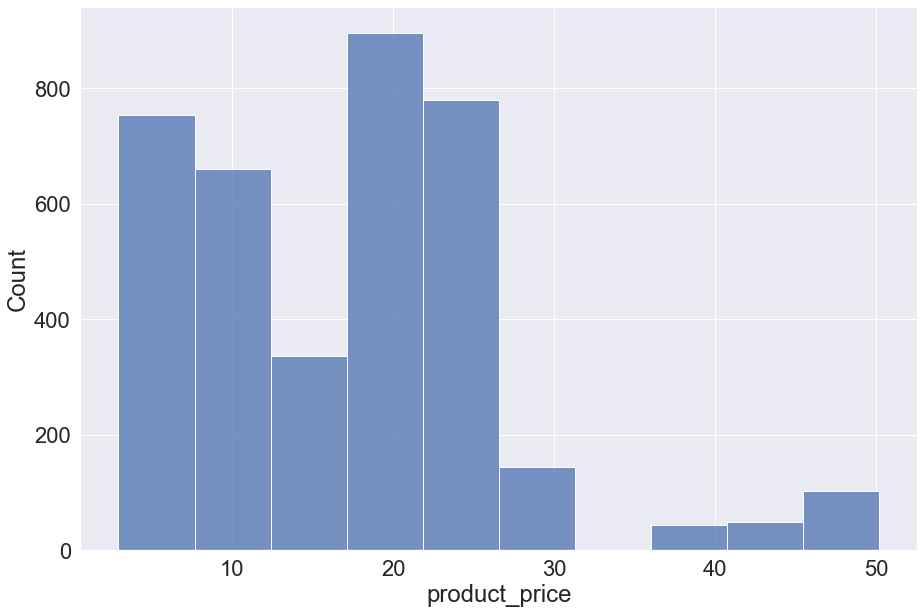

In [76]:
# visualizing product price distribution
plt.figure(figsize = (15,10))
sns.set(font_scale = 2)
sns.histplot(data=df, x="product_price", bins = 10)

### Product Popularity

What are the most popular face mask products?
Top 5 products include (Most Popular to Least):
- Nano Reuabsle AFce Protection Mask
- 100% Cotton Reuseable Face Masks
- KN95
- Disposable KF94 ( N95 / KN95/ FFP2 ) Mask
- Disposable Protective Mask	


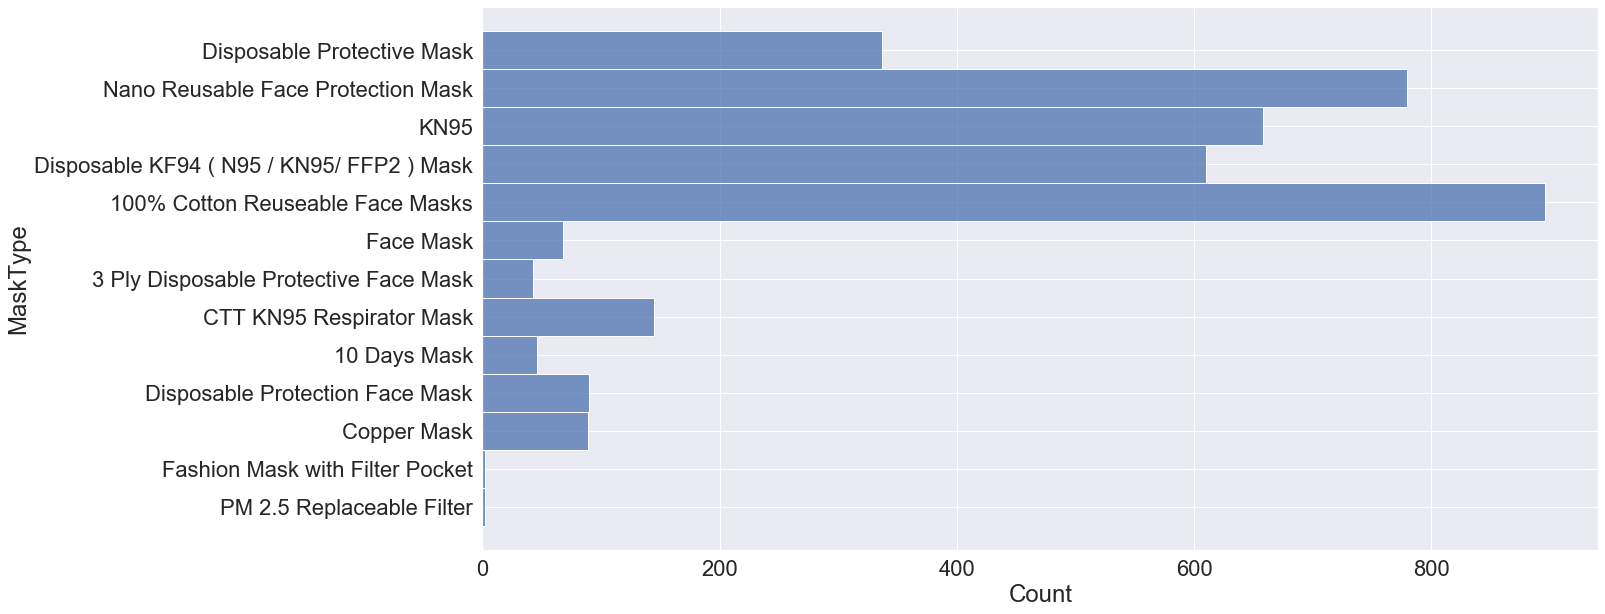

In [77]:
plt.figure(figsize = (20,10))
sns.set(font_scale = 2)
ax = sns.histplot(data=df, y="MaskType")

#### Brand is not a good metric as there is not enough variability between brands and can be unreliable.

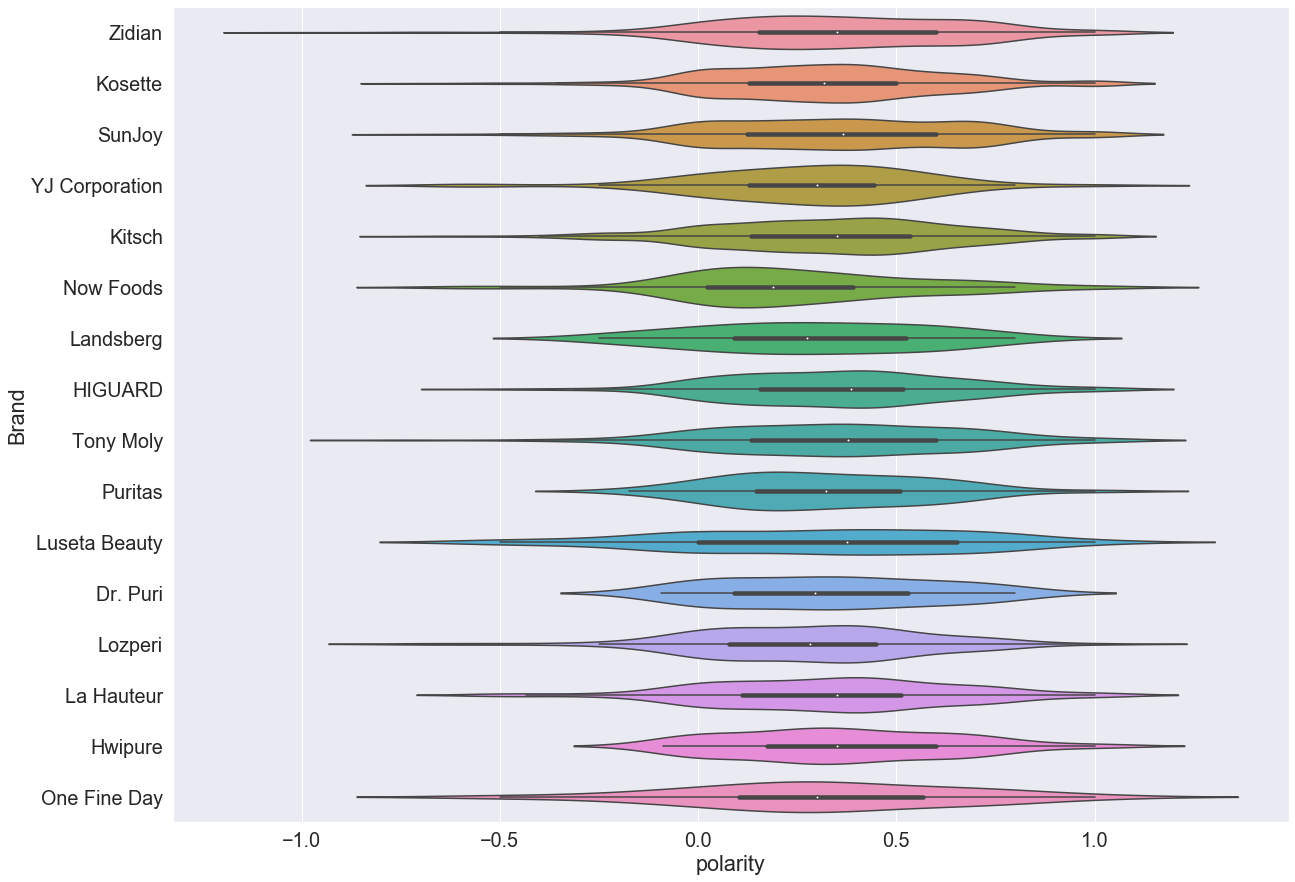

In [78]:
sns.set(font_scale = 1.8)
plt.figure(figsize = (20,15))
sns.violinplot(data = df, x = 'polarity', y='Brand')

### Usage Type

As a whole, there does not seem to be a significant preference between Reusable & Disposable face masks.

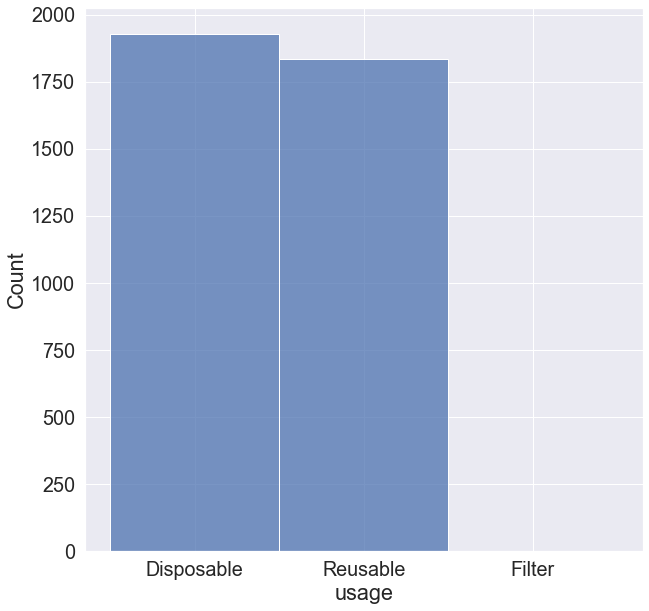

In [79]:
plt.figure(figsize = (10,10))
ax = sns.histplot(data=df, x="usage")

### Customer Geographical Distribution

#### Most of the customer base comes from the **US, Russia, and Saudi Arabia (less significant)**

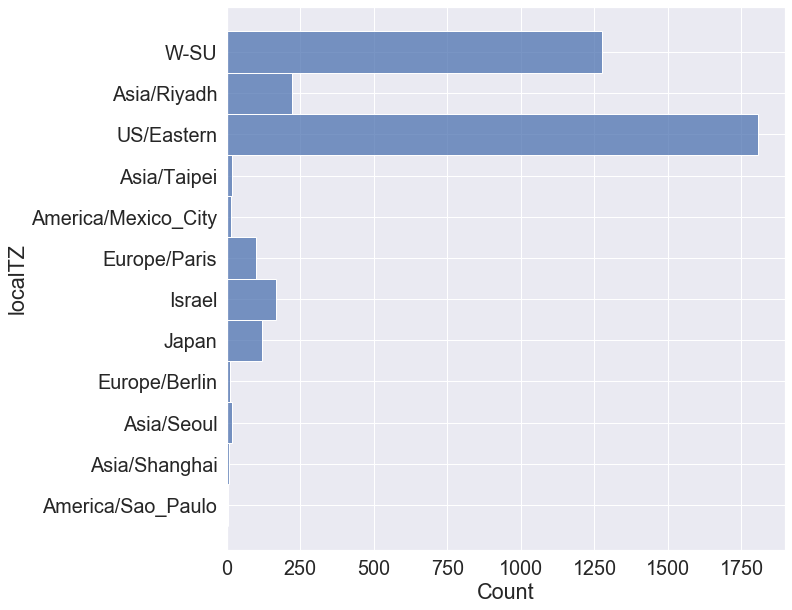

In [80]:
plt.figure(figsize = (10,10))
sns.histplot(data = df, y='localTZ')

### Customer Activity Time-Series

#### Steady increase in activity until we see a massive fluctuation in activity from **December 2020 - February 2021**. We can explore this later once we get to Consumer-focused analysis.


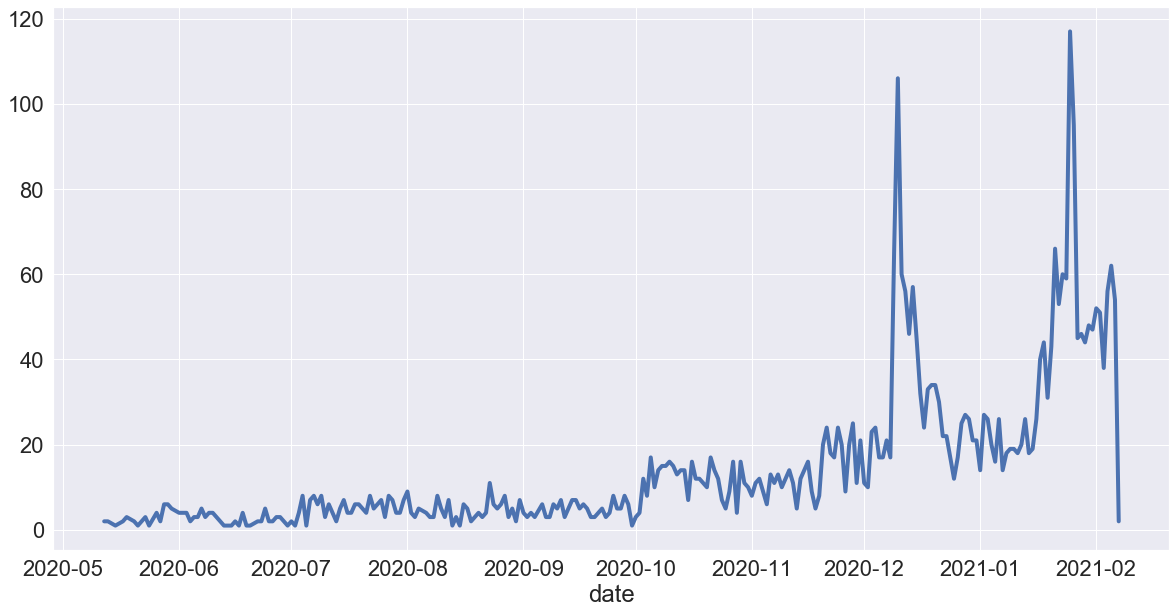

In [81]:
date_data = df.groupby(['date']).size() # grabs unique dates and their frequency

sns.set(font_scale = 2)
plt.figure(figsize = (20,10))

sns.lineplot(data = date_data, color = 'b', linewidth=4)

In [82]:
date_data

date
2020-05-12     2
2020-05-13     2
2020-05-15     1
2020-05-17     2
2020-05-18     3
              ..
2021-02-03    38
2021-02-04    56
2021-02-05    62
2021-02-06    54
2021-02-07     2
Length: 262, dtype: int64

### Customer activity time-slots

Take aways:
- More activity in 2020 than 2021
- Customers tend to be more active in colder months like January/December (*Could be artifiact of COVID cases*)
- Consistent activity throughout the week
- Mostly active from 10AM - 10PM (slight dip around 4PM-6PM could be due to people not shopping right after work)


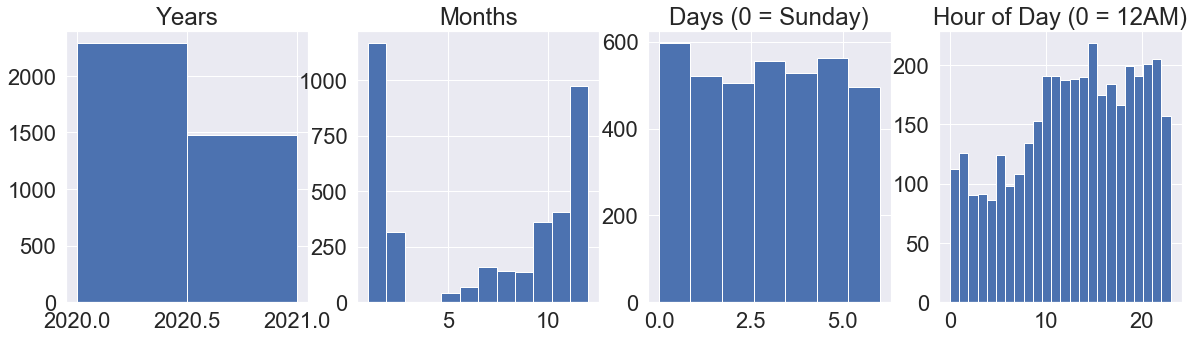

In [83]:
# choose style for plots
sns.set_style('darkgrid')
# define figure and axes for subplots

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# plots for year, month, days and time of day
year = df.year.hist(ax=axes[0], bins = 2).set_title('Years')
month = df.month.hist(ax=axes[1], bins = 12).set_title('Months')
dow = df.day_of_week.hist(ax=axes[2], bins = 7).set_title('Days (0 = Sunday)')
hour = df.hour.hist(ax=axes[3], bins = 24).set_title('Hour of Day (0 = 12AM)')



## **Data with positive reviews**
### Since we want to know things about the products the consumers like then we have to filter out consumers who did not like the products as this will affect our ability to extract information about what and why consumers liked certain products.
### We will use the *polarity* score we calculated in our Sentiment Analysis to filter out negative review. For this case we will consider any positive score **> 0** to be a 'liked' review of a product. This is subject to adjustment either by increasing the polarity threshold or by additionally filtering through subjectivity score (minimizing error in sentiment analysis). Since our data is limited we want to look at the most data points as possible while still having a decently accurate view.

In [84]:
# filtering out negative reviews
df_positive = df[df['polarity'] > 0].reset_index(drop = True)

# prepare word count data
positive_mask_words = pd.Series(" ".join(df_positive['cleaned_review_mask']).split()).value_counts()[:30].reset_index()
positive_mask_words = positive_mask_words.rename(columns={'index':'words',0:'counts'})

#positive_mask_words

### What do customers like the most about mask products?

- Comfortability
- fit
- quality (fabric)
- breathability
- good size
- good fit on ear/nose

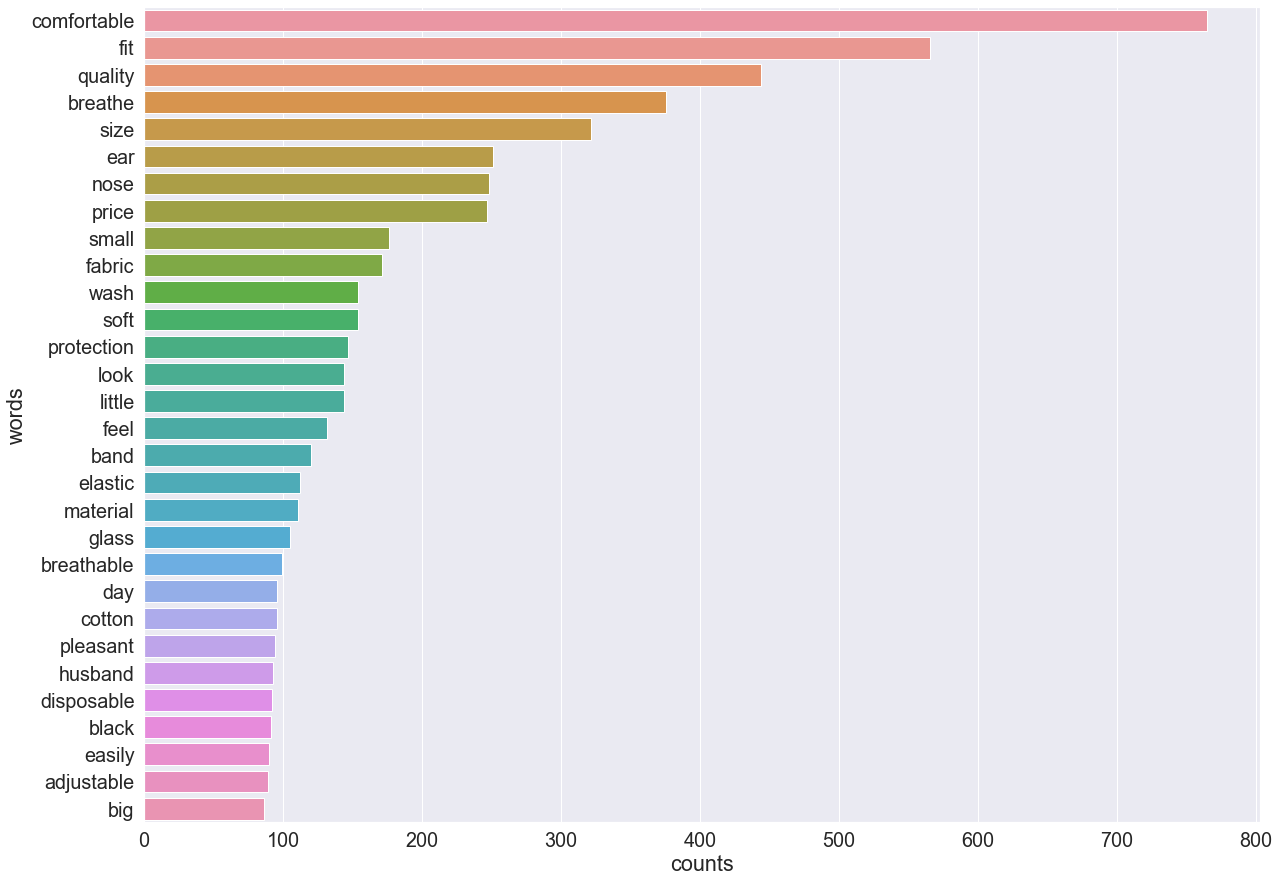

In [85]:
sns.set(font_scale = 1.8)
plt.figure(figsize = (20,15))
sns.barplot(data = positive_mask_words, y='words', x='counts')


### *Comparing sentiment gauge with direct rating Value*

In [86]:
df_positive_rate = df[df['ratingValue'] > 30].reset_index(drop = True) # considering rating above 30 to be a good review.

# extract valuable words by their frequency
positive_rate_words = pd.Series(" ".join(df_positive_rate['cleaned_review_mask']).split()).value_counts()[:30].reset_index()
positive_rate_words = positive_rate_words.rename(columns={'index':'words',0:'counts'})
positive_rate_words

words  counts
0   comfortable     757
1           fit     528
2       quality     424
3       breathe     391
4          size     306
5          nose     245
6           ear     244
7         price     242
8          wash     163
9        fabric     162
10        small     159
11       little     158
12         soft     149
13   protection     145
14         look     129
15         feel     126
16         band     119
17      elastic     109
18     material     104
19        glass     100
20   breathable      99
21       cotton      99
22          day      98
23        black      96
24   disposable      94
25      husband      92
26   adjustable      89
27     pleasant      88
28          big      85
29        color      83

### Looks like there is not much difference in terms of using sentiment score vs rating value to extract popular product characteristics. But I think NLP analysis will be more accurate in the long run with larger datasets since human language is often a more accurate metric of how poeple feel than a numeric rating system.

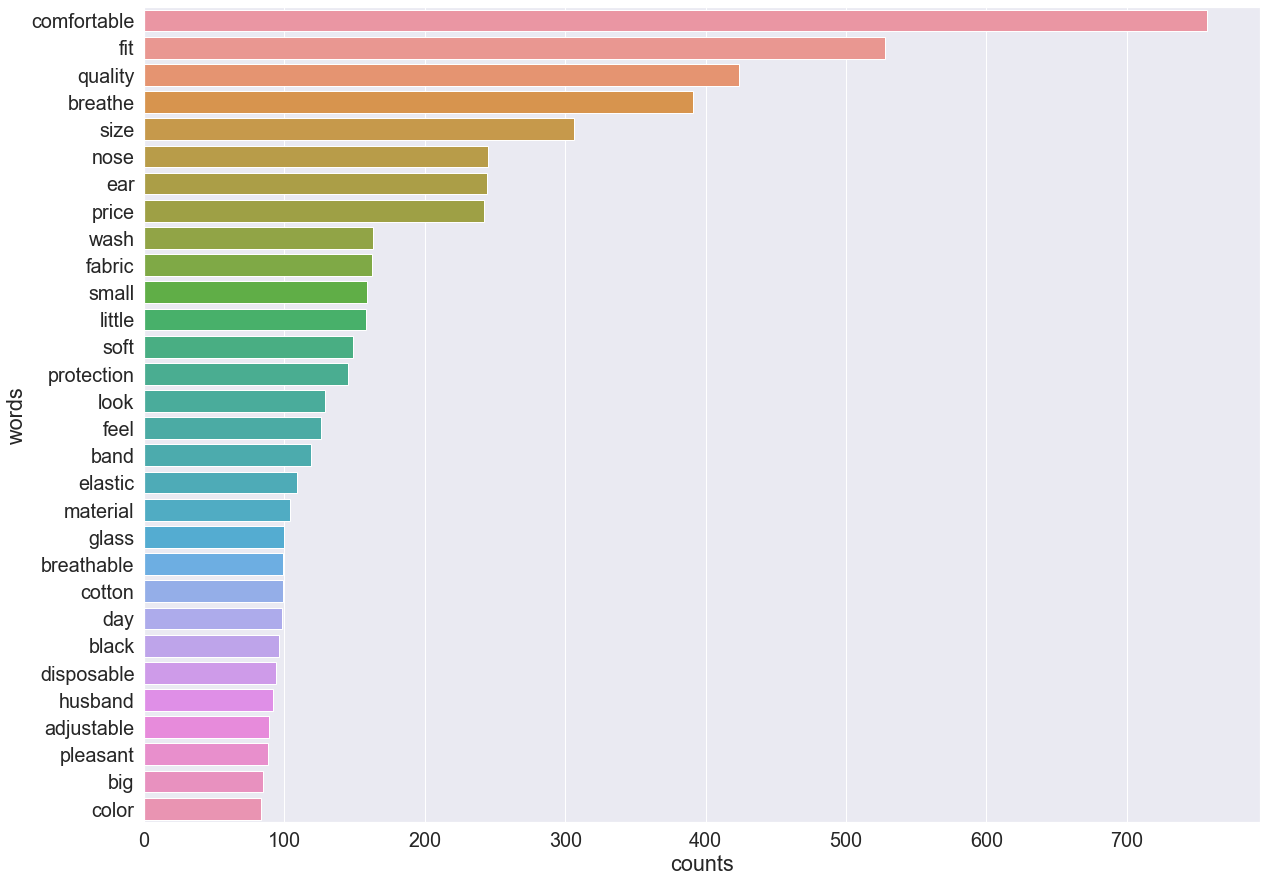

In [87]:
sns.set(font_scale = 1.8)
plt.figure(figsize = (20,15))
sns.barplot(data = positive_rate_words, y='words', x='counts')


### NOTE: A similar analysis can be done for asking what the customers did not like about their products.

In [88]:
# filter out positive reviews
df_negative = df[df['polarity'] < 0].reset_index(drop = True)

# extract valuable words by their frequency
negative_mask_words = pd.Series(" ".join(df_negative['cleaned_review_mask']).split()).value_counts()[:30].reset_index()
negative_mask_words = negative_mask_words.rename(columns={'index':'words',0:'counts'})
negative_mask_words

words  counts
0         small      65
1        little      47
2       breathe      46
3          size      34
4         thick      32
5           ear      32
6         price      28
7       quality      26
8           bad      25
9     difficult      24
10    expensive      23
11       fabric      23
12          fit      22
13         thin      21
14         nose      19
15         hard      19
16     material      19
17        tight      18
18         long      18
19        smell      17
20         look      17
21         wash      16
22         band      16
23         feel      16
24          get      15
25        think      15
26        black      14
27  comfortable      13
28          big      12
29      elastic      12

### Most of the things about mask products that people complain about seems to have to do with
- small size (small/little/size)
- breathability (breath/thick)


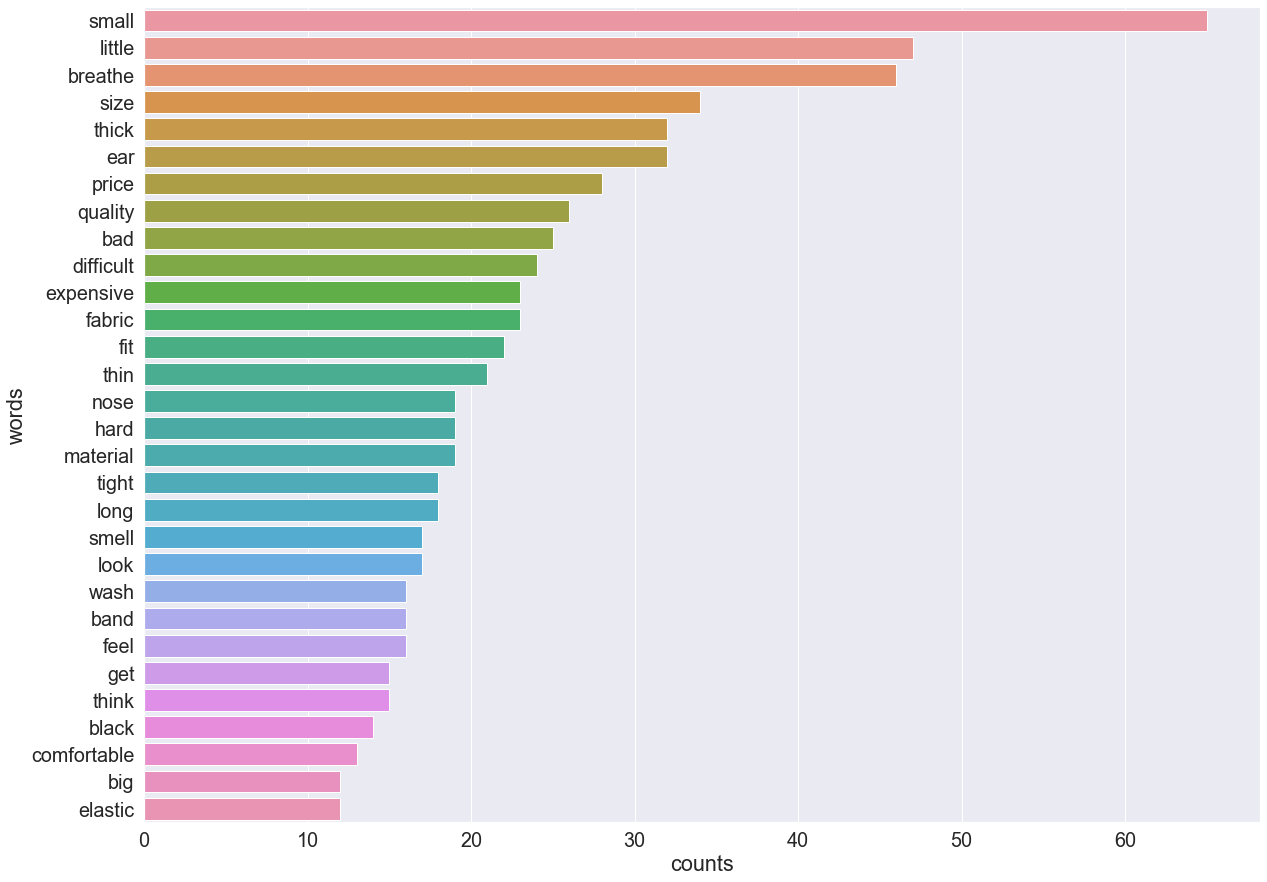

In [89]:
sns.set(font_scale = 1.8)
plt.figure(figsize = (20,15))
sns.barplot(data = negative_mask_words, y='words', x='counts')

# Product-focused analysis

In [90]:
product_array = df.MaskType.unique() # product array for when we want to reference products as plot titles
product_array

array(['Disposable Protective Mask', 'Nano Reusable Face Protection Mask',
       'KN95', 'Disposable KF94 ( N95 / KN95/ FFP2 ) Mask',
       '100% Cotton Reuseable Face Masks', 'Face Mask',
       '3 Ply Disposable Protective Face Mask',
       'CTT KN95 Respirator Mask', '10 Days Mask',
       'Disposable Protection Face Mask', 'Copper Mask',
       'Fashion Mask with Filter Pocket', 'PM 2.5 Replaceable Filter'],
      dtype=object)

In [91]:
# prepare to create a list of dataframes that contains info about each individual product
df1 = df.loc[df['MaskType'] == 'Disposable Protective Mask']                              
df2 = df.loc[df['MaskType'] == 'Nano Reusable Face Protection Mask']
df3 = df.loc[df['MaskType'] == 'KN95']
df4 = df.loc[df['MaskType'] == 'Disposable KF94 ( N95 / KN95/ FFP2 ) Mask']
df5 = df.loc[df['MaskType'] == 'Face Mask']
df6 = df.loc[df['MaskType'] == '100% Cotton Reuseable Face Masks']
df7 = df.loc[df['MaskType'] == '3 Ply Disposable Protective Face Mask']
df8 = df.loc[df['MaskType'] == 'CTT KN95 Respirator Mask']
df9 = df.loc[df['MaskType'] == '10 Days Mask']
df10 = df.loc[df['MaskType'] == 'Disposable Protection Face Mask']
df11 = df.loc[df['MaskType'] == 'Copper Mask']
df12 = df.loc[df['MaskType'] == 'Fashion Mask with Filter Pocket']
df13 = df.loc[df['MaskType'] == 'PM 2.5 Replaceable Filter']

# product dataframe list
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13]

In [92]:
# Sentiment analysis for each product
# considering positive reviews only

positive_df_list = [] # list of product dataframes that have polarity > 0
positive_word_list = [] # list of most common positive words from reviews of each product datframes
for i in range(len(df_list)):
    positive_df_list.append(df_list[i][df_list[i]['polarity'] > 0].reset_index(drop = True))
    positive_word_list.append(pd.Series(" ".join(positive_df_list[i]['cleaned_review_mask']).split()).value_counts()[:15].reset_index().rename(columns={'index':'words',0:'counts'}))

### Top Product Features

Disposable Protective Mask:
- quality
- black
- comfortable
- price
- breathe
- fit/size

Nano Reusable Face Protection Mask:
- comfortable
- fit/size
- nose
- breathe
- ear
- adjustable

KN95:
- fit
- comfortable
- quality
- price
- breathe

Disposable KF94 ( N95 / KN95/ FFP2 ) Mask:
- Comfortable
- fit
- breathe
- quality

100% Cotton Reusable Face Masks:
- comfortable
- soft
- quality/fabric/cotton

100% Cotton Reuseable Face Masks:
- comfortable
- soft
- quality/fabric/cotton

### Popular features from products (Top 5 Products = Red)

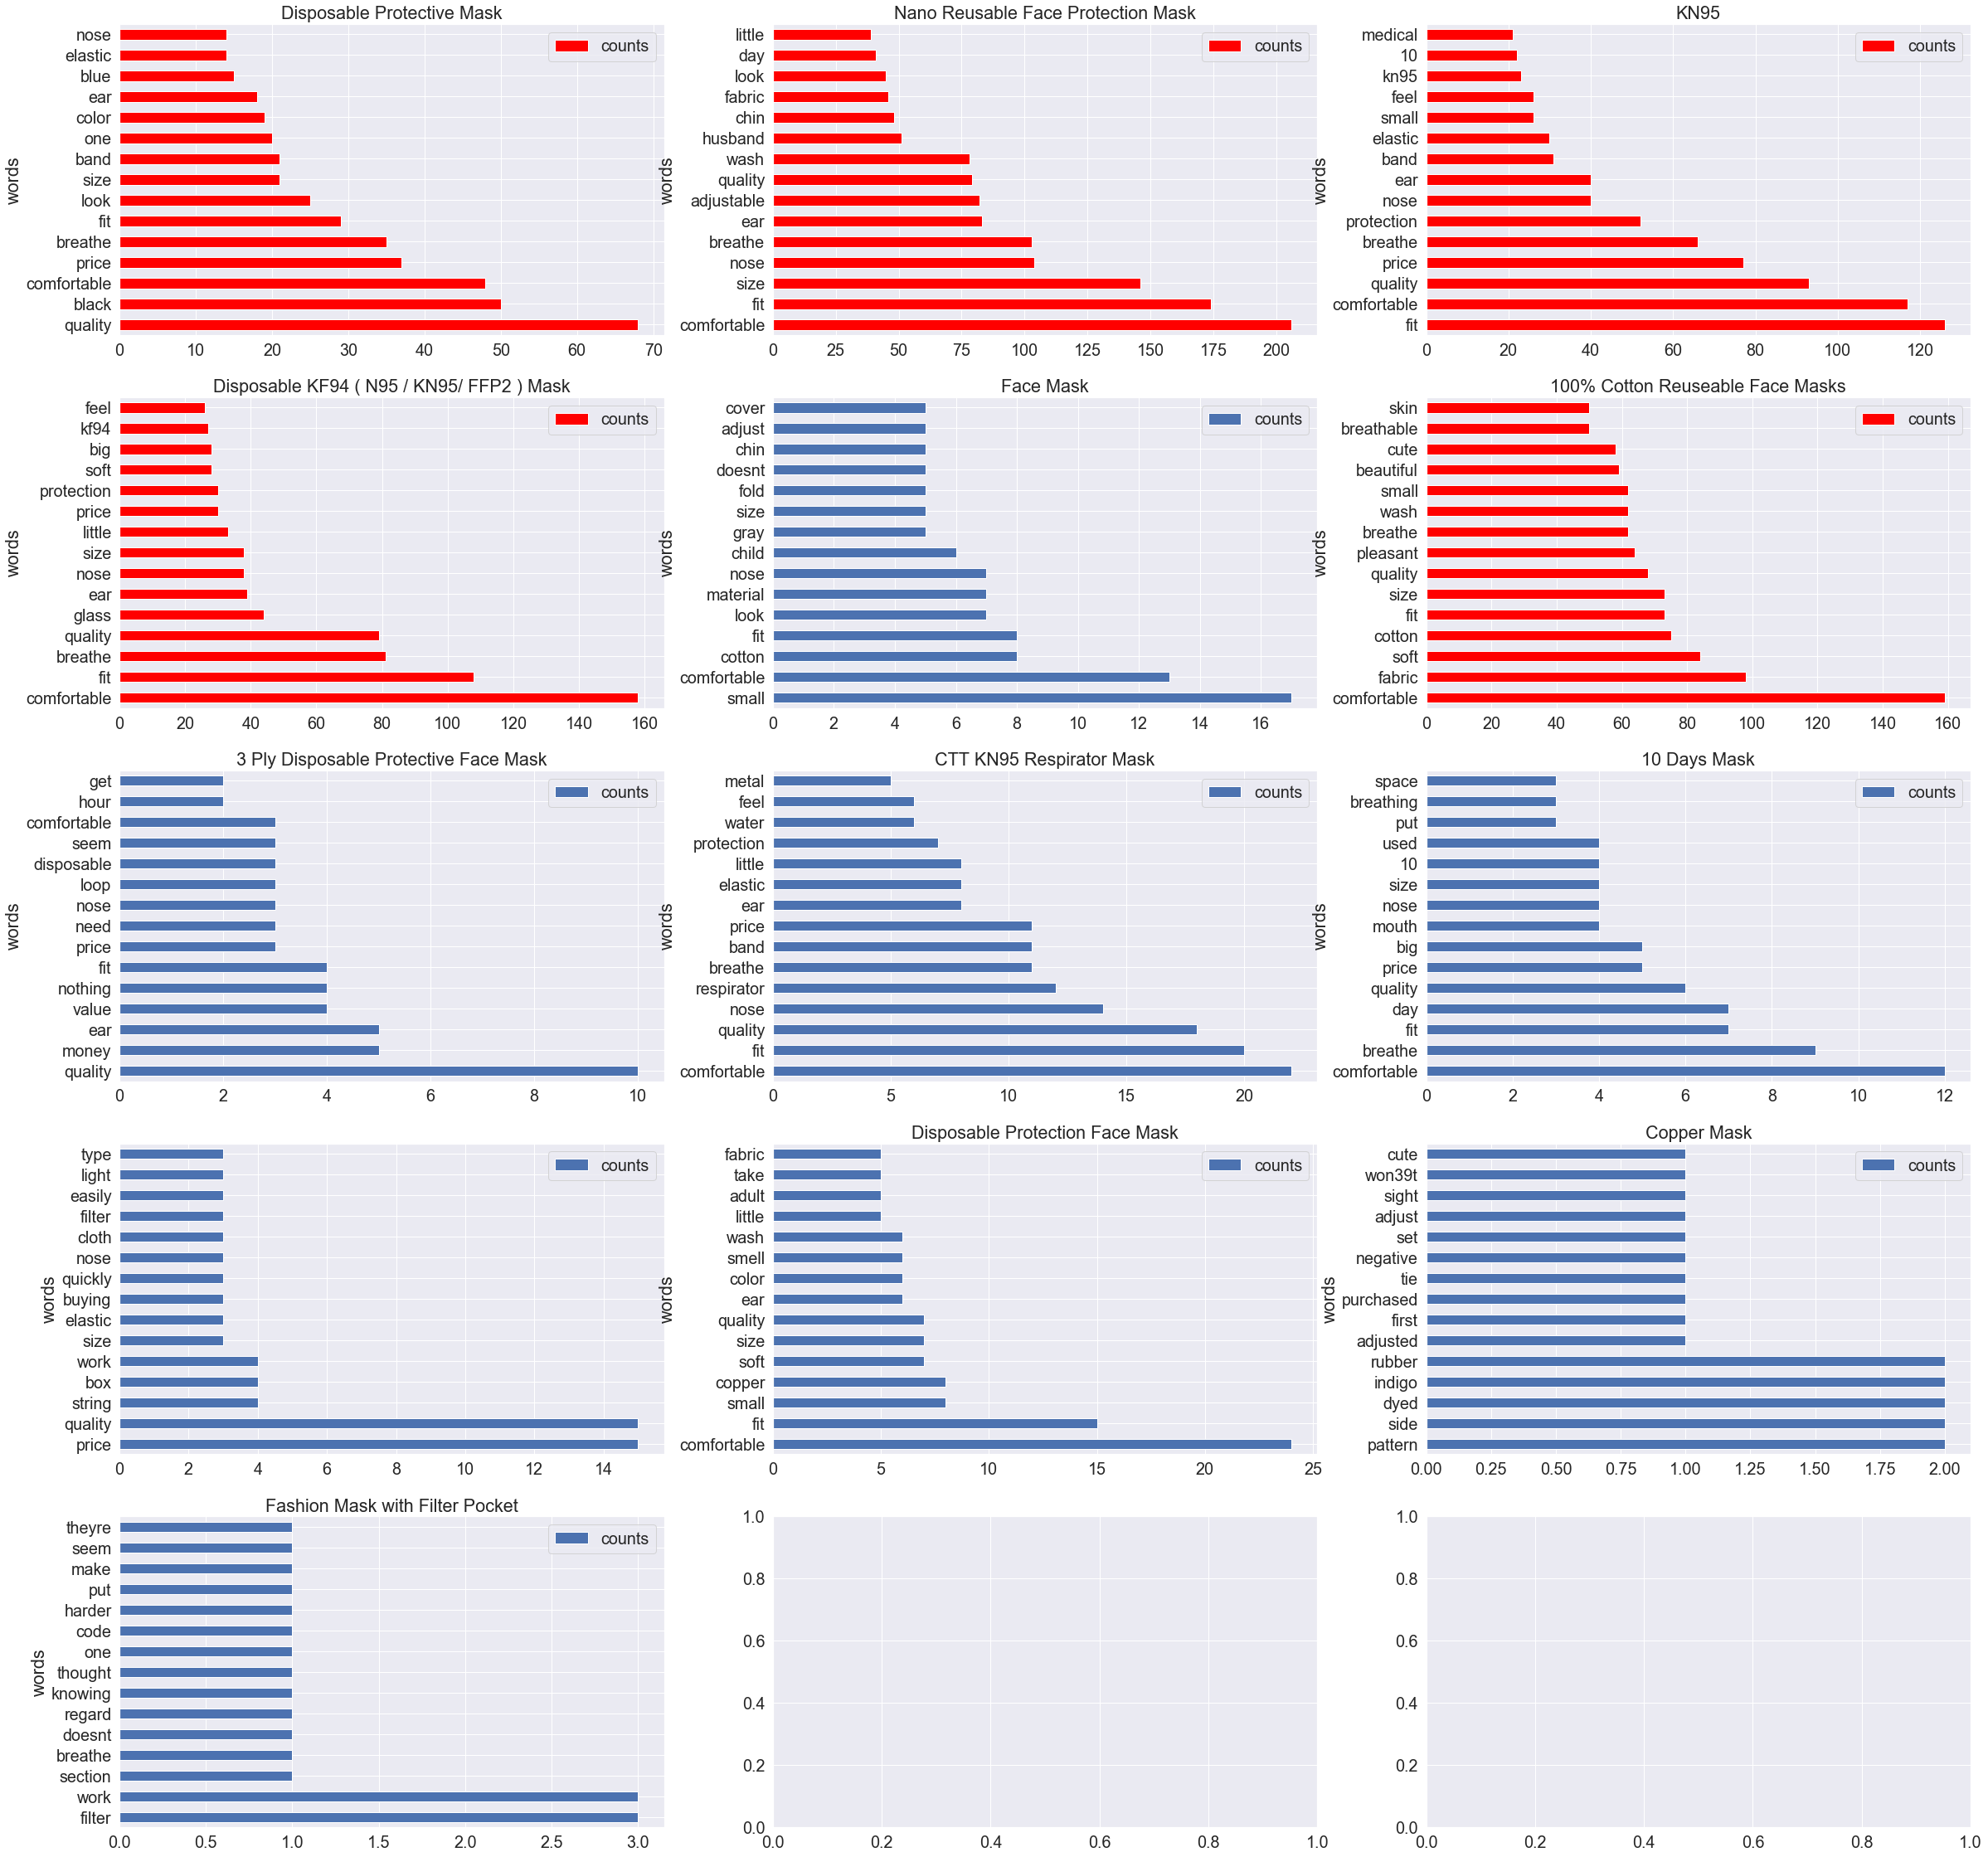

In [93]:
# choose style for plots
sns.set(font_scale = 1.8)
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(40, 40))
ax1 = positive_word_list[0].plot.barh(x='words',y='counts', ax=axes[0,0],color=['red'])
ax2 = positive_word_list[1].plot.barh(x='words',y='counts', ax=axes[0,1],color=['red'])
ax3 = positive_word_list[2].plot.barh(x='words',y='counts',ax=axes[0,2],color=['red'])
ax4 = positive_word_list[3].plot.barh(x='words',y='counts', ax=axes[1,0],color=['red'])
ax5 = positive_word_list[4].plot.barh(x='words',y='counts',ax=axes[1,1])
ax6 = positive_word_list[5].plot.barh(x='words',y='counts',ax=axes[1,2], color=['red'])
ax7 = positive_word_list[6].plot.barh(x='words',y='counts', ax=axes[2,0])
ax8 = positive_word_list[7].plot.barh(x='words',y='counts', ax=axes[2,1])
ax9 = positive_word_list[8].plot.barh(x='words',y='counts',ax=axes[2,2])
ax10 = positive_word_list[9].plot.barh(x='words',y='counts',ax=axes[3,0])
ax11 = positive_word_list[10].plot.barh(x='words',y='counts',ax=axes[3,1])
ax12 = positive_word_list[11].plot.barh(x='words',y='counts', ax=axes[3,2])
ax13 = positive_word_list[12].plot.barh(x='words',y='counts',ax=axes[4,0])

ax1.title.set_text(positive_df_list[0]['MaskType'][0])
ax2.title.set_text(positive_df_list[1]['MaskType'][0])
ax3.title.set_text(positive_df_list[2]['MaskType'][0])
ax4.title.set_text(positive_df_list[3]['MaskType'][0])
ax5.title.set_text(positive_df_list[4]['MaskType'][0])
ax6.title.set_text(positive_df_list[5]['MaskType'][0])
ax7.title.set_text(positive_df_list[6]['MaskType'][0])
ax8.title.set_text(positive_df_list[7]['MaskType'][0])
ax9.title.set_text(positive_df_list[8]['MaskType'][0])
ax11.title.set_text(positive_df_list[9]['MaskType'][0])
ax12.title.set_text(positive_df_list[10]['MaskType'][0])
ax13.title.set_text(positive_df_list[11]['MaskType'][0])


fig.patch.set_facecolor('white')

plt.savefig("product_features.jpg")

### Sentiment Analysis for each product (Top 5 products = red)

In [94]:
# create new list of dataframes but grouping them by individual MaskType product
product_sentiment = df_list.copy()
for i in range(len(product_sentiment)):
    product_sentiment.append(product_sentiment[i].groupby('MaskType'))

In [95]:
del product_sentiment[14:28]

In [135]:
product_sentiment[5].MaskType

3725    100% Cotton Reuseable Face Masks
2245    100% Cotton Reuseable Face Masks
2214    100% Cotton Reuseable Face Masks
3667    100% Cotton Reuseable Face Masks
2353    100% Cotton Reuseable Face Masks
                      ...               
3749    100% Cotton Reuseable Face Masks
2336    100% Cotton Reuseable Face Masks
2288    100% Cotton Reuseable Face Masks
2244    100% Cotton Reuseable Face Masks
2470    100% Cotton Reuseable Face Masks
Name: MaskType, Length: 896, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

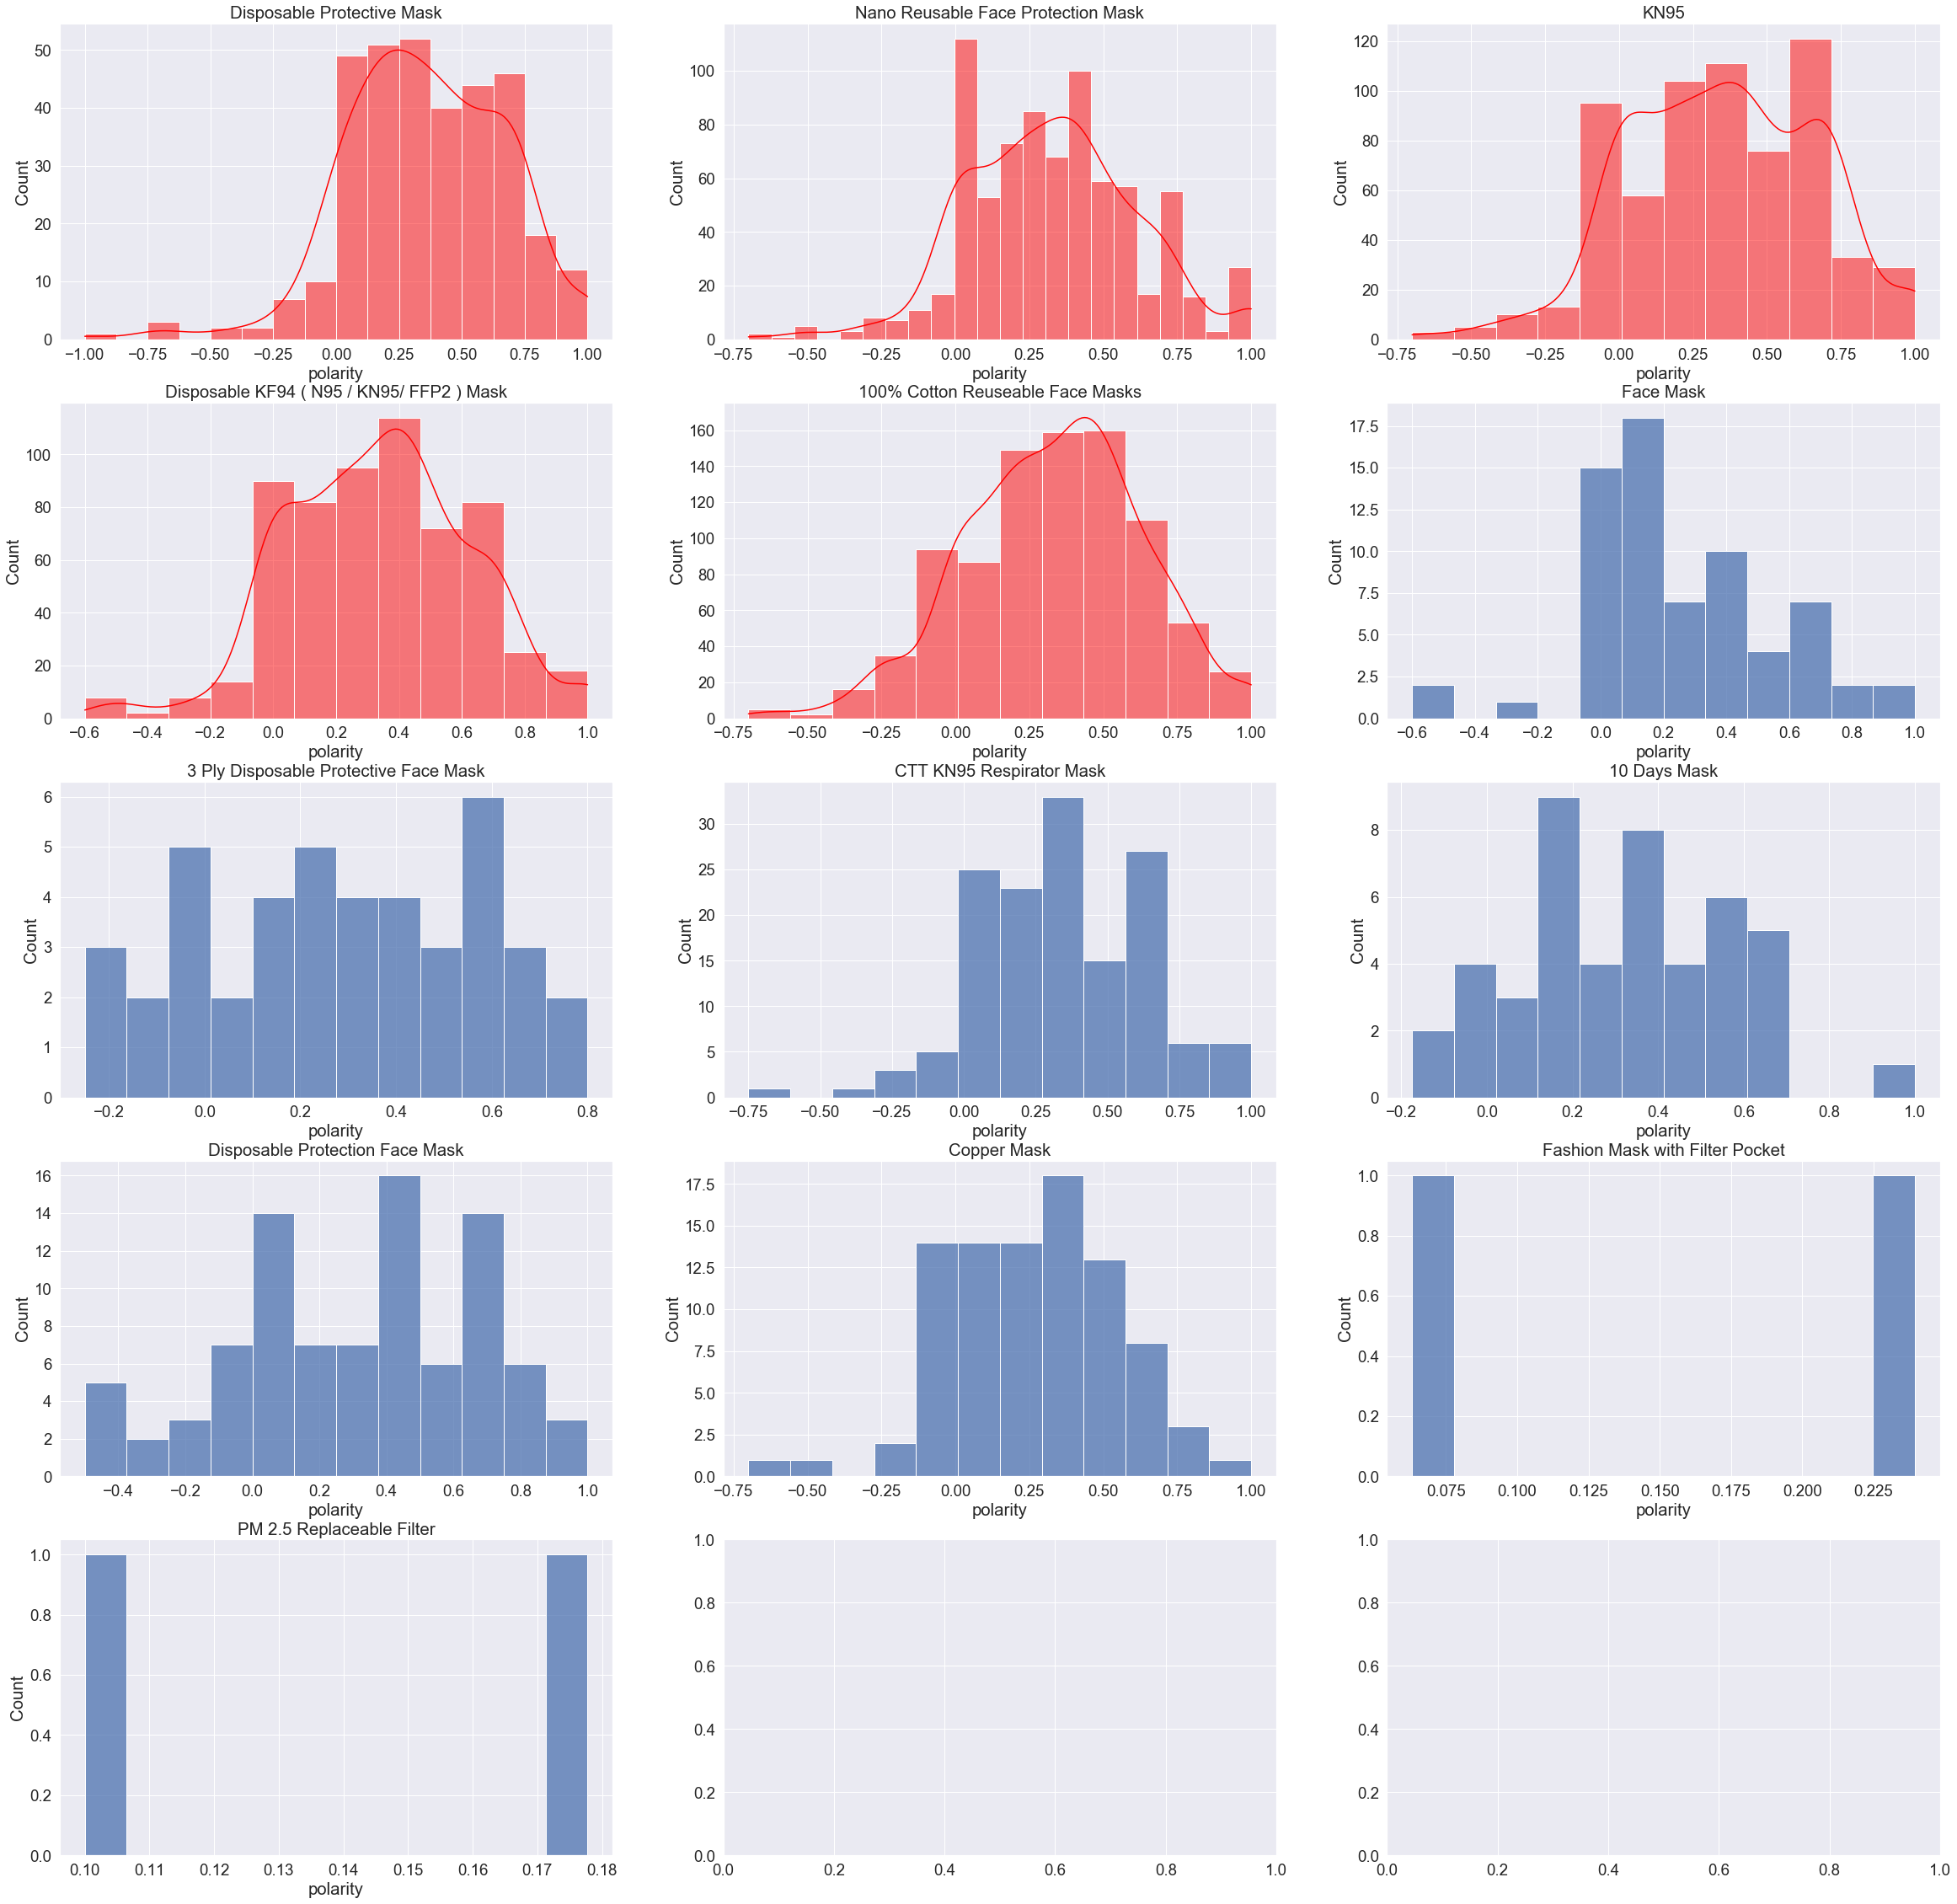

In [137]:
sns.set(font_scale = 1.7)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(40, 40))
ax0 = sns.histplot(data=product_sentiment[0], ax=axes[0,0], x="polarity", color = 'red', kde = True).set(title=product_array[0])
ax1 = sns.histplot(data=product_sentiment[1], ax=axes[0,1], x="polarity", color = 'red', kde = True).set(title=product_array[1])
ax2 = sns.histplot(data=product_sentiment[2], ax=axes[0,2], x="polarity", bins=12, color = 'red', kde = True).set(title=product_array[2])
ax3 = sns.histplot(data=product_sentiment[3], ax=axes[1,0], x="polarity", bins=12, color = 'red', kde = True).set(title=product_array[3])
ax4 = sns.histplot(data=product_sentiment[5], ax=axes[1,1], x="polarity", bins=12, color = 'red', kde = True).set(title=product_array[4])
ax5 = sns.histplot(data=product_sentiment[4], ax=axes[1,2], x="polarity", bins=12).set(title=product_array[5])
ax6 = sns.histplot(data=product_sentiment[6], ax=axes[2,0], x="polarity", bins=12).set(title=product_array[6])
ax7 = sns.histplot(data=product_sentiment[7], ax=axes[2,1], x="polarity", bins=12).set(title=product_array[7])
ax8 = sns.histplot(data=product_sentiment[8], ax=axes[2,2], x="polarity", bins=12).set(title=product_array[8])
ax9 = sns.histplot(data=product_sentiment[9], ax=axes[3,0], x="polarity", bins=12).set(title=product_array[9])
ax10 = sns.histplot(data=product_sentiment[10], ax=axes[3,1], x="polarity", bins=12).set(title=product_array[10])
ax11 = sns.histplot(data=product_sentiment[11], ax=axes[3,2], x="polarity", bins=12).set(title=product_array[11])
ax12 = sns.histplot(data=product_sentiment[12], ax=axes[4,0], x="polarity", bins=12).set(title=product_array[12])

plt.savefig("product_sentiment.jpg")

In [97]:
# Create new list of dataframes by grouping them by each date and their frequency
product_copy = df_list.copy()
product_timeseries = []
for i in range(len(product_copy)):
    product_timeseries.append(product_copy[i].groupby(['date']).size())
    

#### Considering only Top 5 products

In [98]:
p1 = product_timeseries[0]
p2 = product_timeseries[1]
p3 = product_timeseries[2]
p4 = product_timeseries[3]
p5 = product_timeseries[4]
#p6 = product_timeseries[6]
timeseries = pd.concat([p1,p2,p3,p4,p5], axis=1)

timeseries.rename(columns={0: product_array[0],
                          1: product_array[1],
                          2: product_array[2],
                          3: product_array[3],
                          4: product_array[4]},inplace=True)
timeseries=timeseries.fillna(0)

In [138]:
# Adjust time frame right before the fluctuation as anything before is pretty low activity and uninteresting

timeseries = timeseries.reset_index()
mask = (timeseries['date'] > '2020-05-01') # can adjust start date
timeseries_trunc = timeseries.loc[mask]

In [150]:
timeseries_trunc

index       date  Disposable Protective Mask  \
0        0 2020-05-12                         0.0   
1        1 2020-05-13                         0.0   
2        2 2020-05-15                         0.0   
3        3 2020-05-18                         0.0   
4        4 2020-05-20                         0.0   
..     ...        ...                         ...   
230    230 2021-02-03                         4.0   
231    231 2021-02-04                         6.0   
232    232 2021-02-05                        10.0   
233    233 2021-02-06                        10.0   
234    234 2021-02-07                         0.0   

     Nano Reusable Face Protection Mask  KN95  \
0                                   2.0   0.0   
1                                   2.0   0.0   
2                                   1.0   0.0   
3                                   3.0   0.0   
4                                   2.0   0.0   
..                                  ...   ...   
230                                 4.0   4.0   
231                                 3.0   9.0   
232                                 7.0   9.0   
233                                 6.0  14.0   
234                                 0.0   1.0   

     Disposable KF94 ( N95 / KN95/ FFP2 ) Mask  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
..                                         ...   
230                                       13.0   
231                                       15.0   
232                                       18.0   
233                                        8.0   
234                                        0.0   

     100% Cotton Reuseable Face Masks  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0  
..                                ...  
230                               0.0  
231                               4.0  
232                               1.0  
233                               0.0  
234                               0.0  

[235 rows x 7 columns]

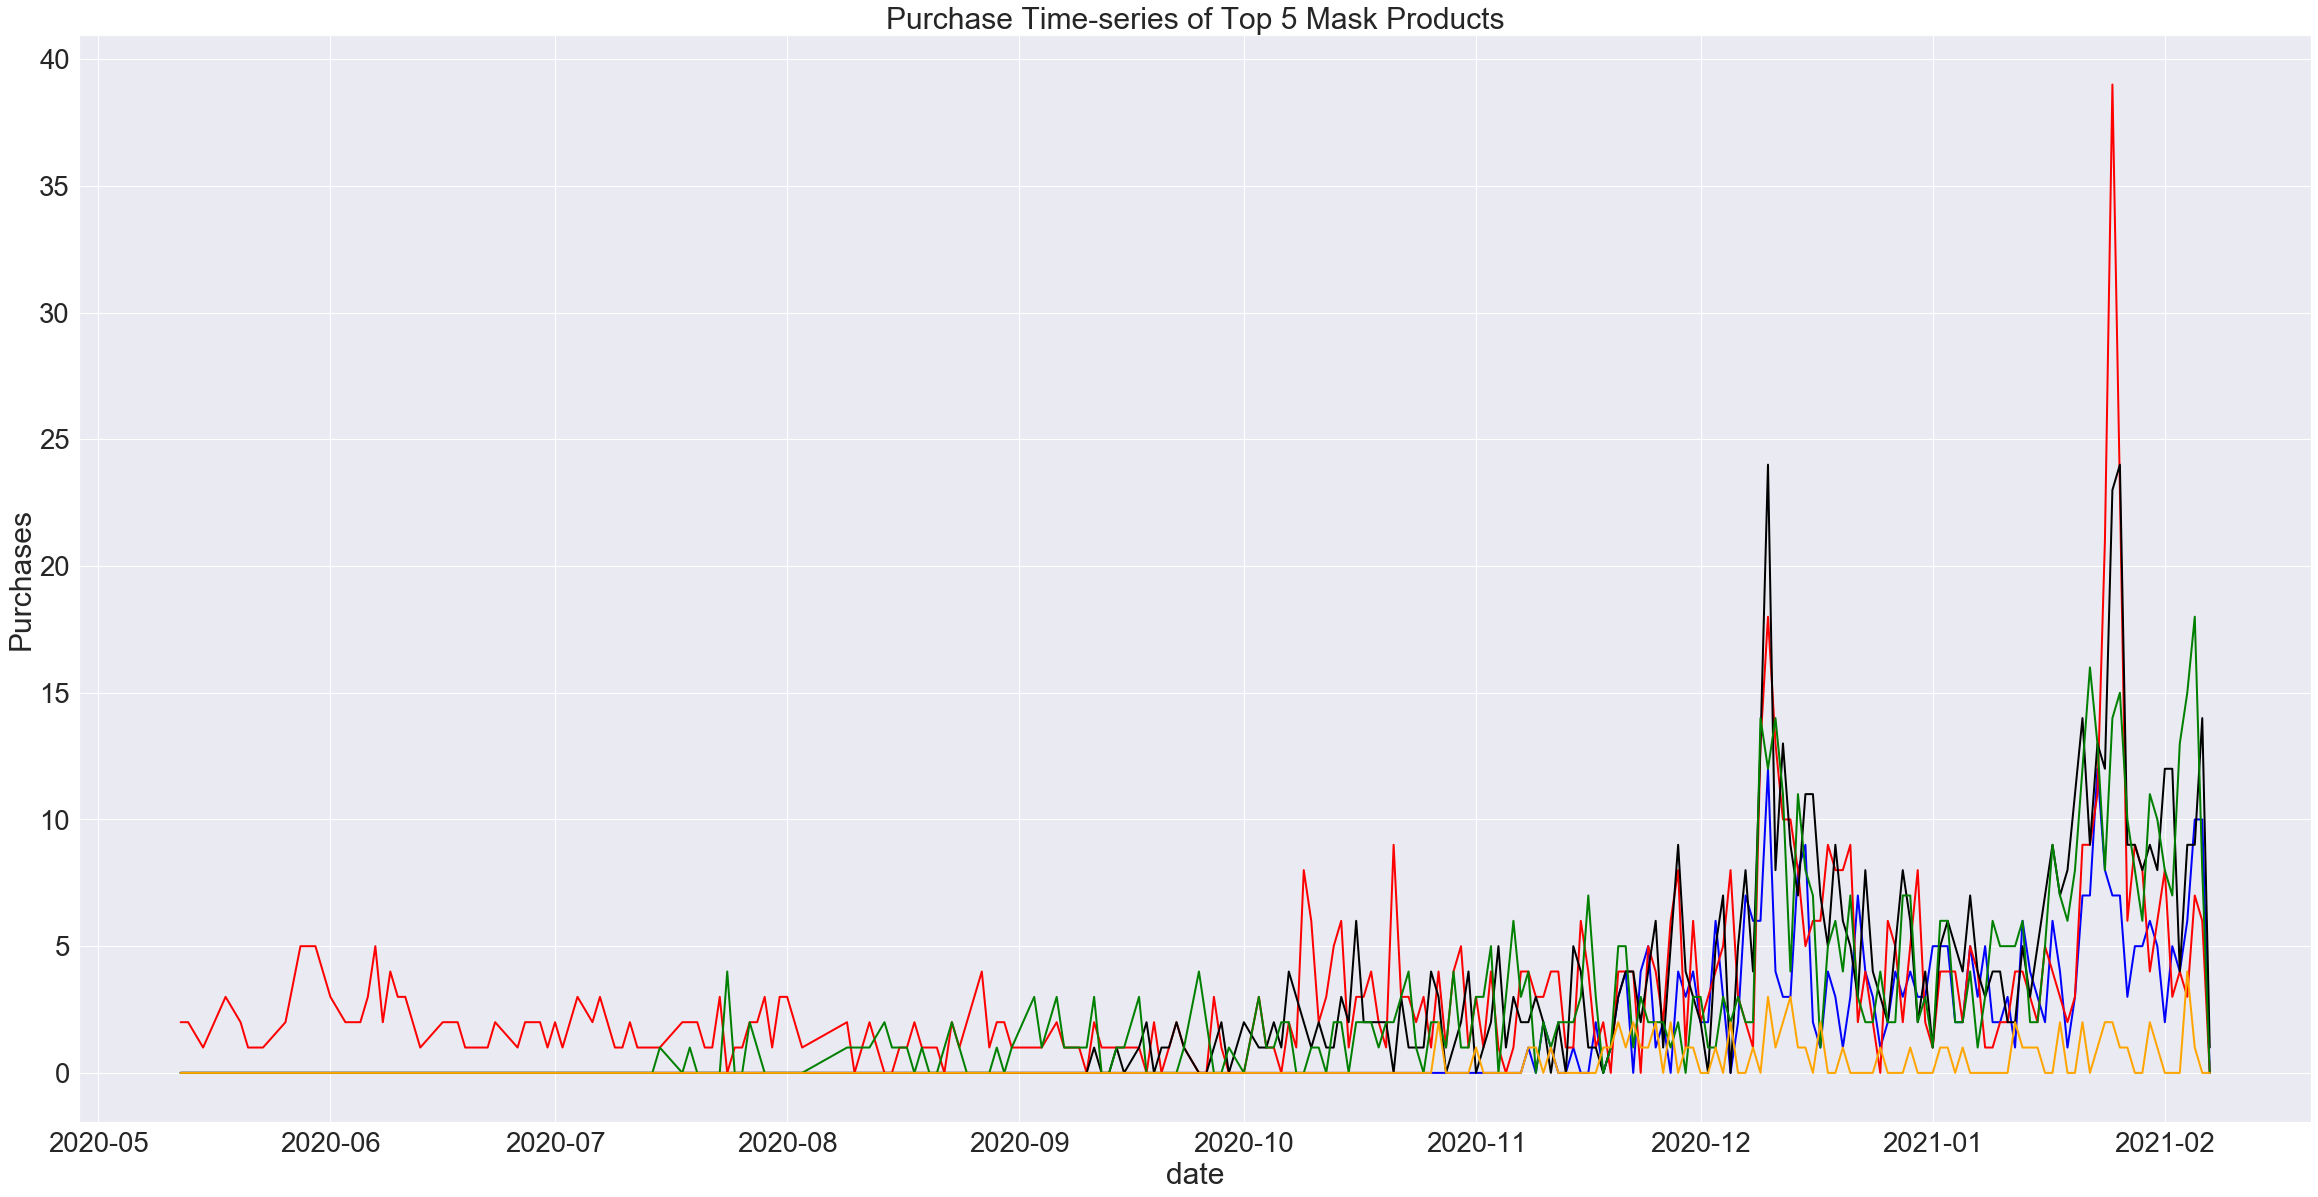

In [145]:
# Top 5 products time series

plt.figure(figsize=(40,20))
sns.set(font_scale = 2.5)

plt1 = sns.lineplot(y="Disposable Protective Mask", x="date", color = 'blue', data=timeseries_trunc,linewidth=2)
plt2 = sns.lineplot(y="Nano Reusable Face Protection Mask", x="date", color = 'red', data=timeseries_trunc,linewidth=2)
plt3 = sns.lineplot(y="KN95", x="date",color = 'black', data=timeseries_trunc,linewidth=2)
plt4 = sns.lineplot(y="Disposable KF94 ( N95 / KN95/ FFP2 ) Mask", x="date",color = 'green', data=timeseries_trunc,linewidth=2)
plt5 = sns.lineplot(y="100% Cotton Reuseable Face Masks", x="date",color = 'orange', data=timeseries_trunc,linewidth=2)
plt3.set_title('Purchase Time-series of Top 5 Mask Products')
# set label
plt.ylabel("Purchases")

plt.show()

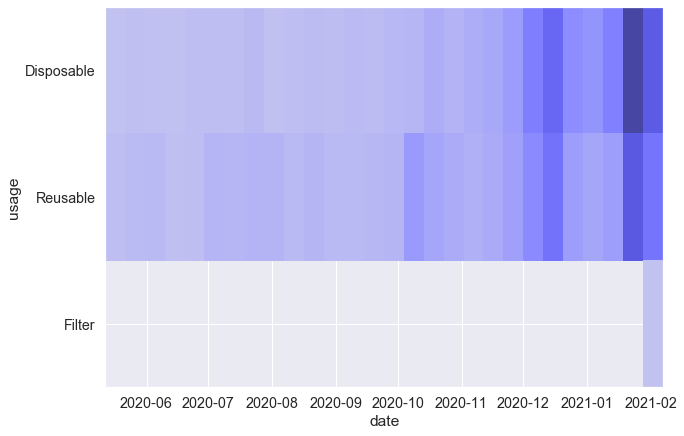

In [159]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.3)

plt1 = sns.histplot(y="usage", x="date", color = 'blue', data=df,linewidth=2)
#plt2 = sns.lineplot(y="usage", x="date", color = 'red', data=df,linewidth=2)

##### Time-series for each individual product out of curiosity. We can see some sifferent behavior for some other masks across time but there are so few purchases of them, we cannot interpret anything meaningful from them.

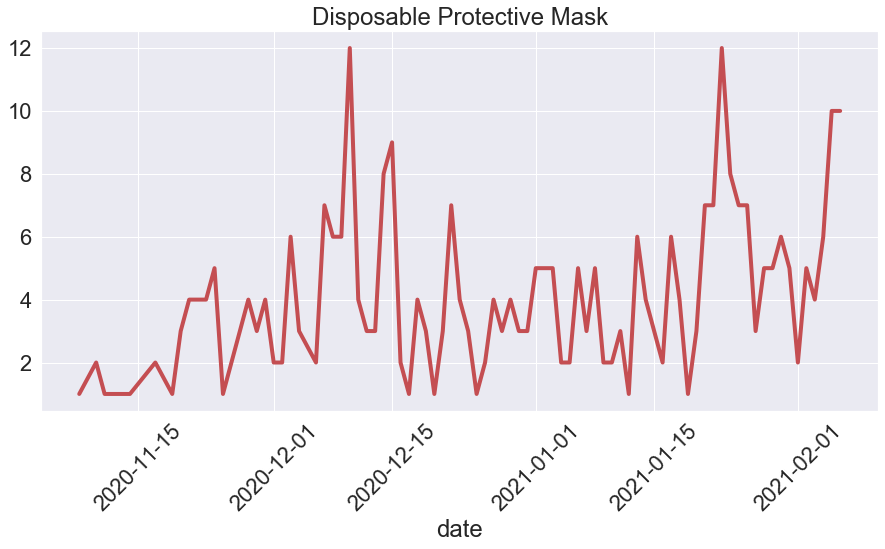

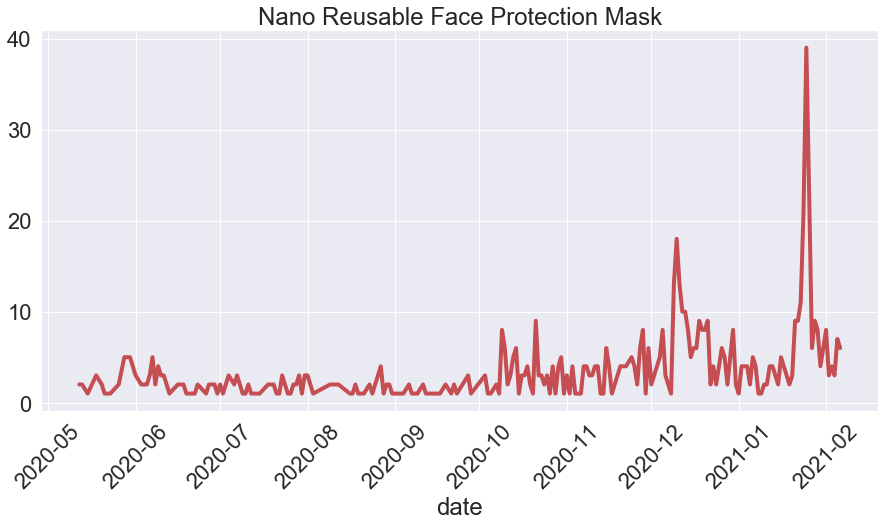

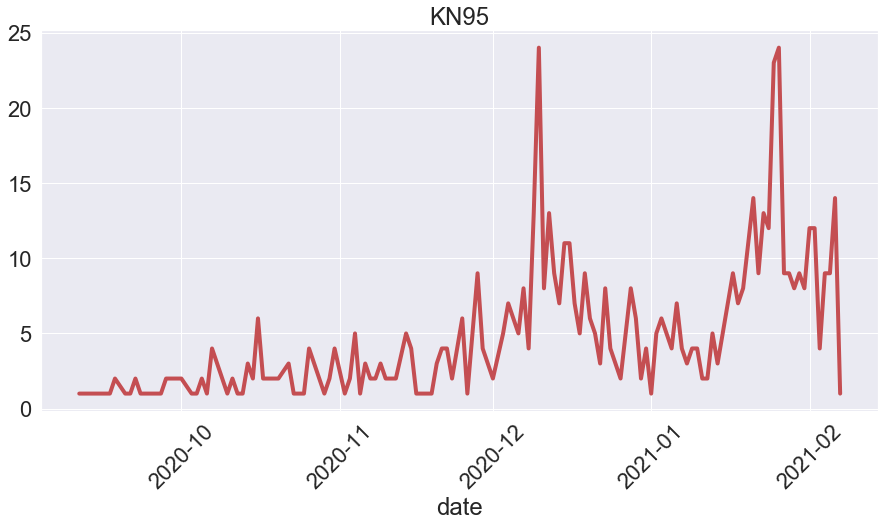

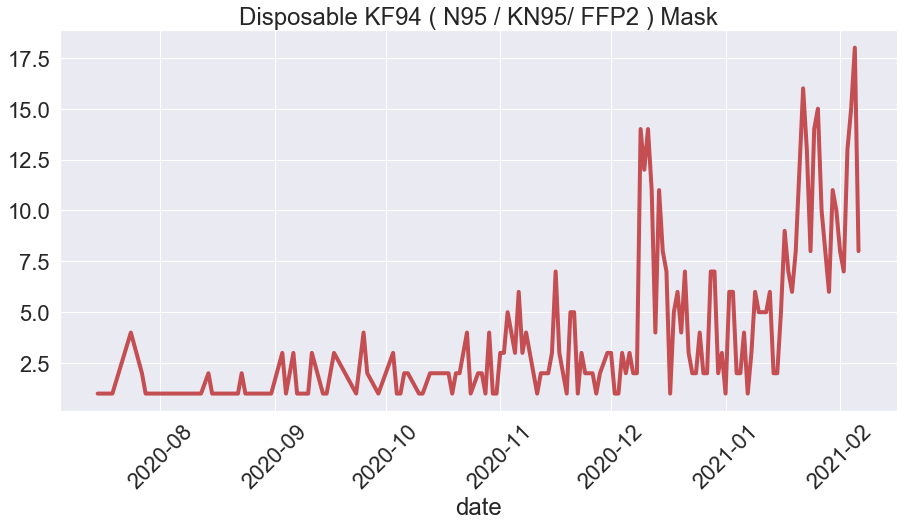

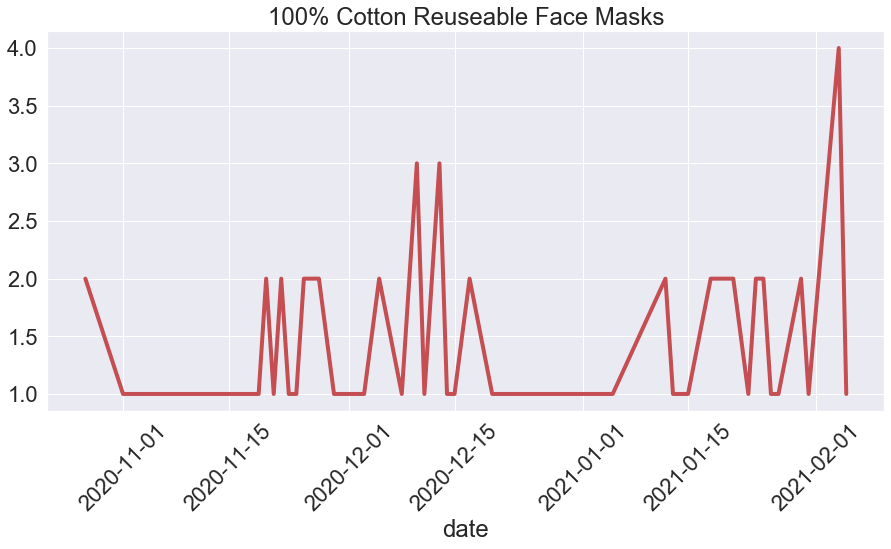

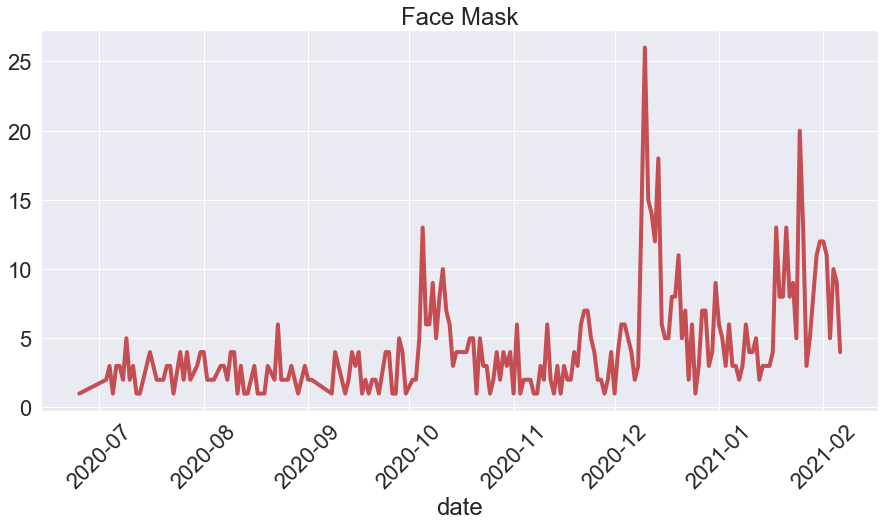

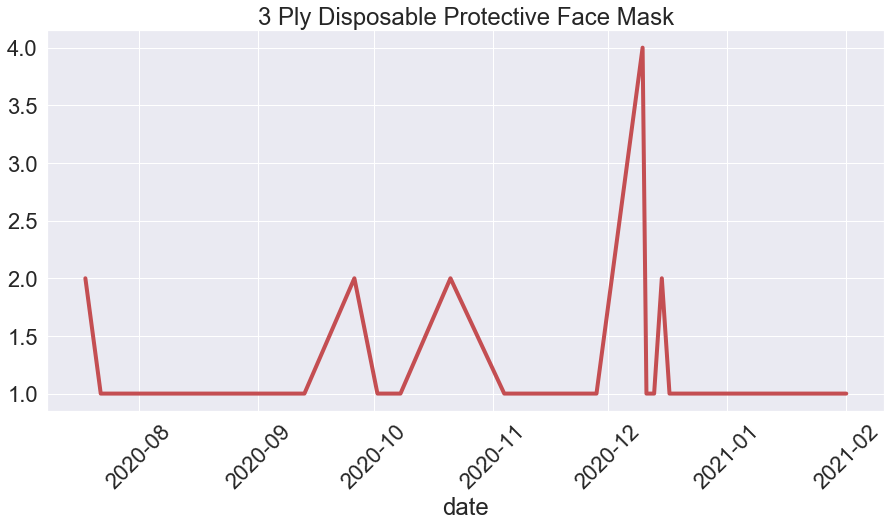

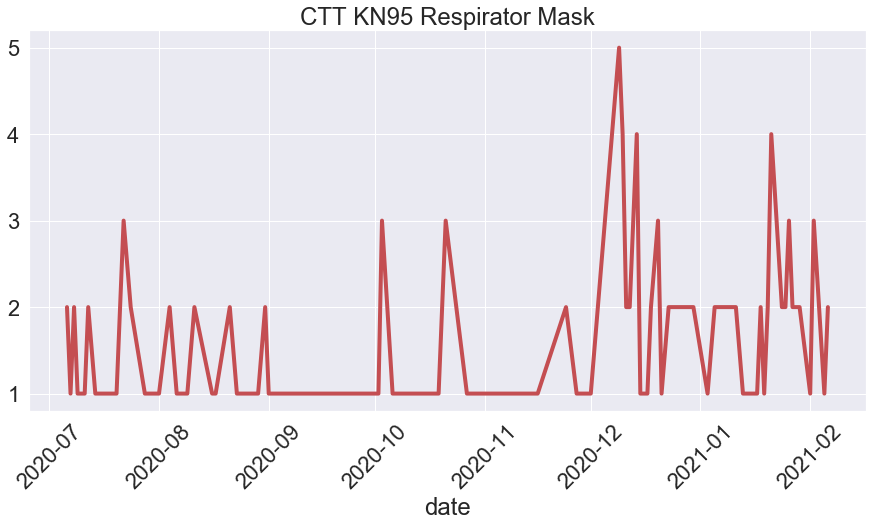

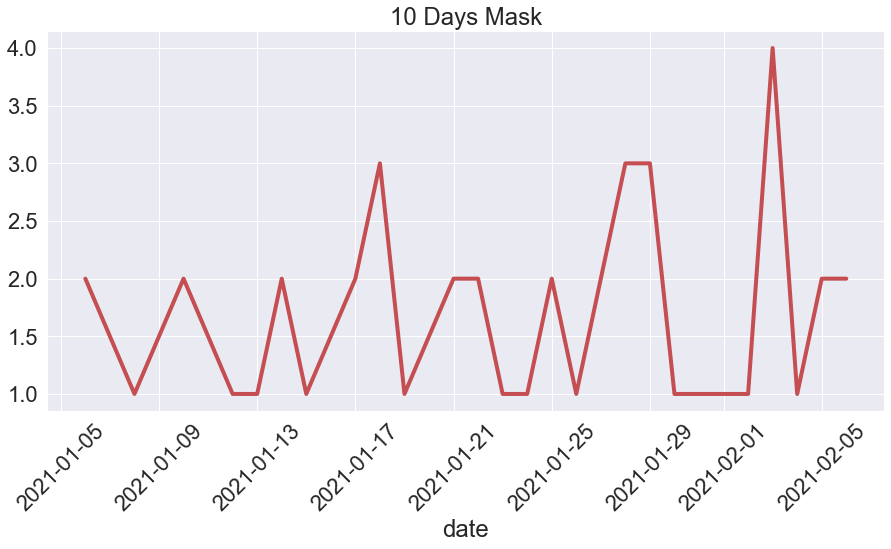

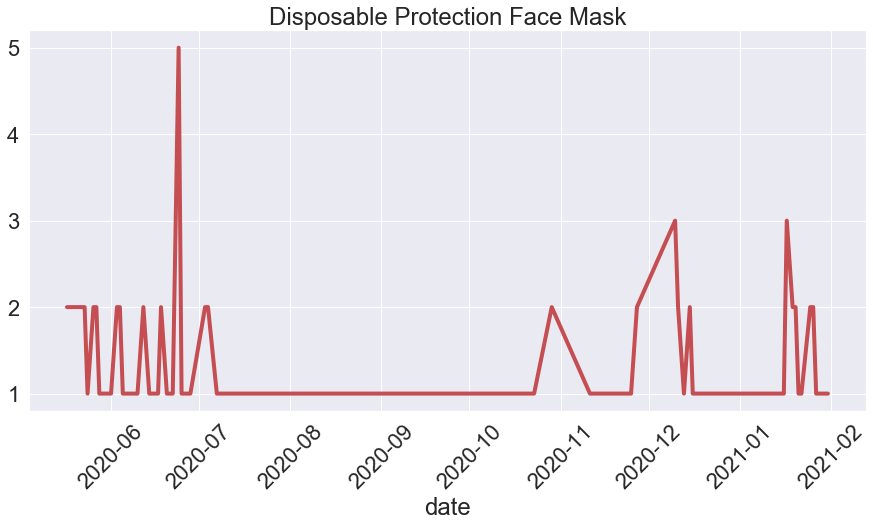

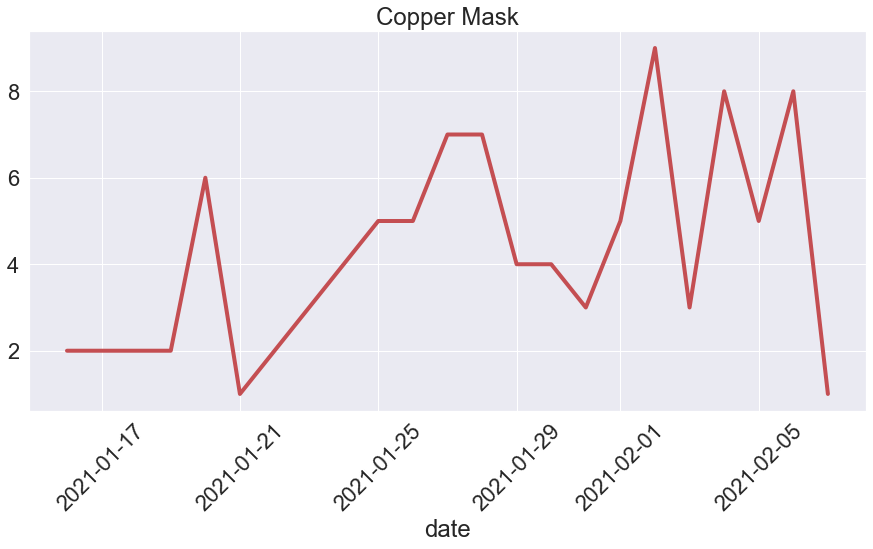

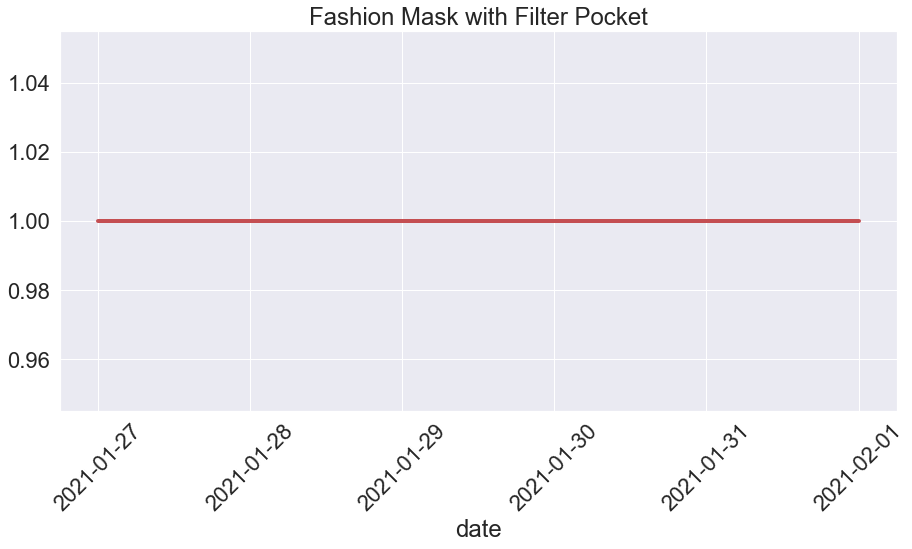

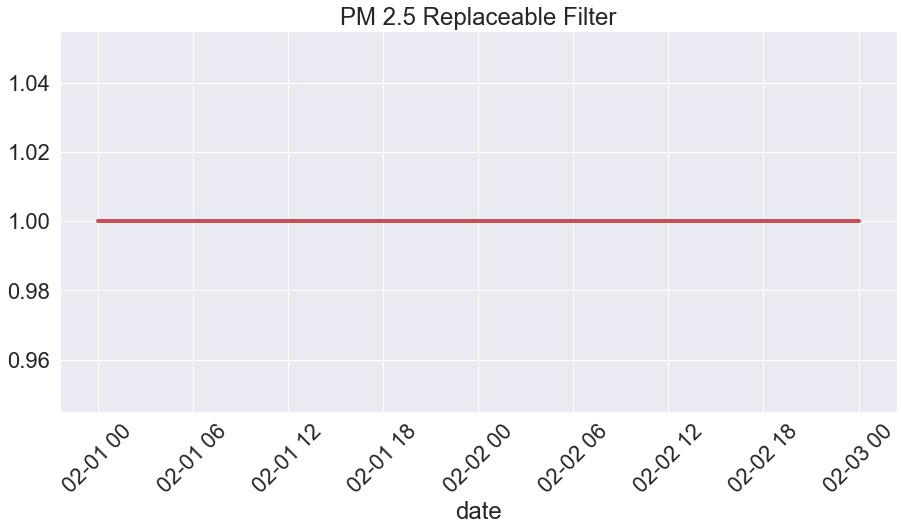

In [102]:
for product in range(len(product_timeseries)):
    sns.set(font_scale = 2)
    plt.subplots(figsize=(15,7))
    
    sns.lineplot(data = product_timeseries[product], color = 'r', linewidth=4).set(title=product_array[product])
    plt.xticks(rotation=45)
    plt.show()


# Consumer Profiles
#### Given the low diveristy of data when it comes to customer characteristics. I will focus on Geography as a basic consumer profile.
#### You could also profile consumers by RFM (Recency,Frequency,Monetary) value but you would need a consistent customer ID labeling. The majority of customers are only distinguished by nickname which is largely just 'iHerb Customer'

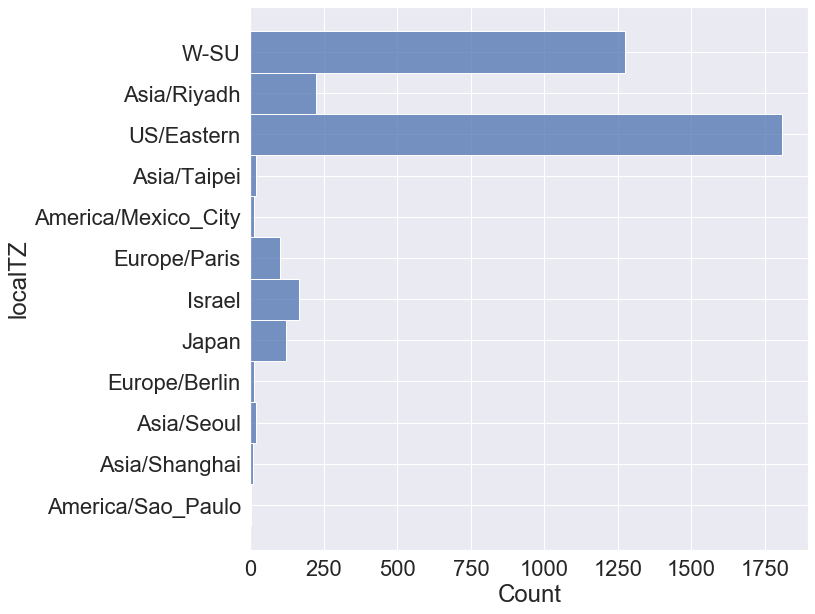

In [103]:
# plot consumer base
plt.figure(figsize=(10,10))
sns.histplot(data=df, y="localTZ", bins = 12)

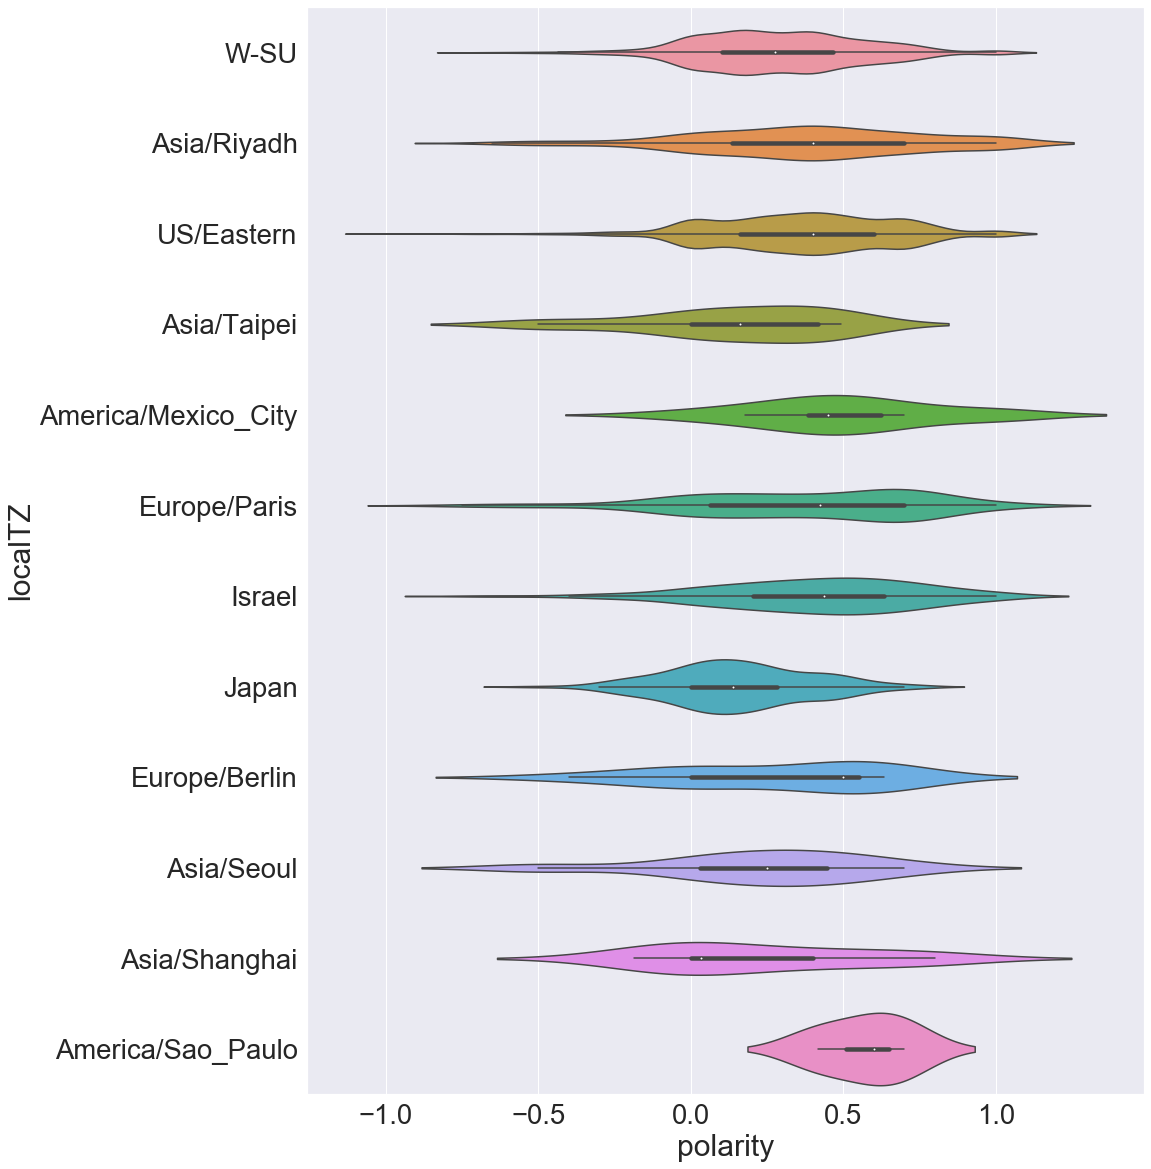

In [104]:
plt.figure(figsize=(15,20))
sns.set(font_scale = 2.5)
sns.violinplot(data=df, x="polarity", y="localTZ", multiple='dodge', bins= 9)

In [105]:
df.MaskType.unique()

array(['Disposable Protective Mask', 'Nano Reusable Face Protection Mask',
       'KN95', 'Disposable KF94 ( N95 / KN95/ FFP2 ) Mask',
       '100% Cotton Reuseable Face Masks', 'Face Mask',
       '3 Ply Disposable Protective Face Mask',
       'CTT KN95 Respirator Mask', '10 Days Mask',
       'Disposable Protection Face Mask', 'Copper Mask',
       'Fashion Mask with Filter Pocket', 'PM 2.5 Replaceable Filter'],
      dtype=object)

([<matplotlib.axis.XTick at 0x7fcfeab535e0>,
 <a list of 5 Text xticklabel objects>)

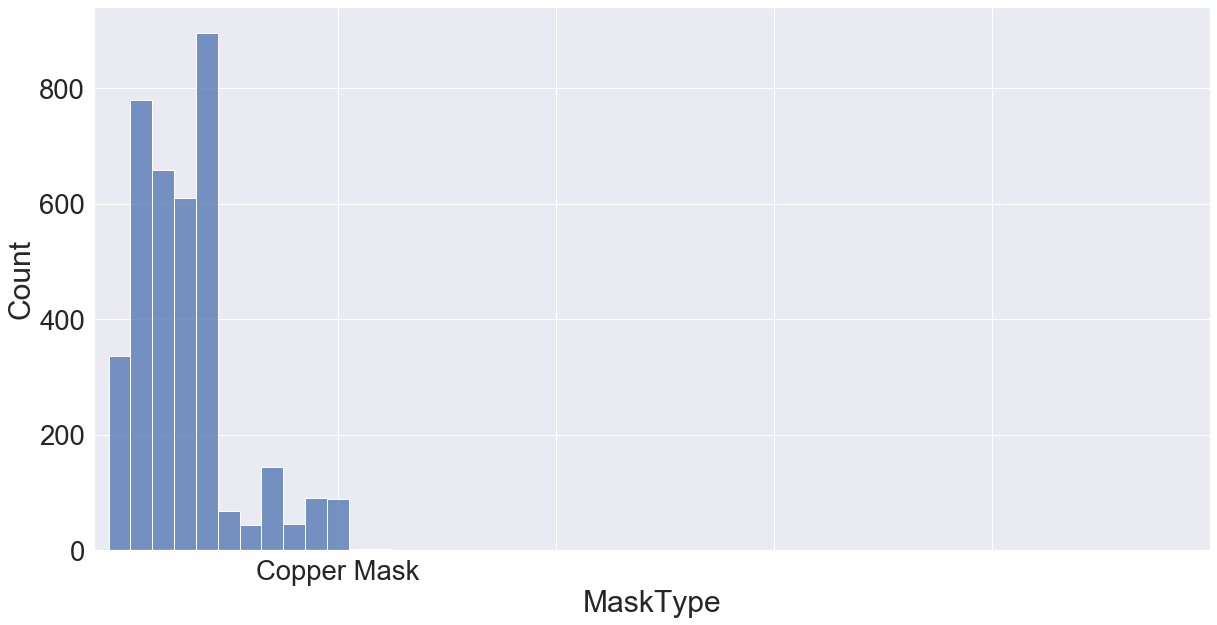

In [106]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="MaskType", bins= 14)
plt.xticks([10,20,30,40,50])

In [107]:
# Creating list of dataframes for consumers from each timezone
geo_df1 = df.loc[df['localTZ'] == 'W-SU']
geo_df2 = df.loc[df['localTZ'] == 'Asia/Riyadh']
geo_df3 = df.loc[df['localTZ'] == 'US/Eastern']                              
geo_df4 = df.loc[df['localTZ'] == 'Asia/Taipei']
geo_df5 = df.loc[df['localTZ'] == 'America/Mexico_City']
geo_df6 = df.loc[df['localTZ'] == 'Europe/Paris']
geo_df7 = df.loc[df['localTZ'] == 'Israel']
geo_df8 = df.loc[df['localTZ'] == 'Japan']
geo_df9 = df.loc[df['localTZ'] == 'Europe/Berlin']
geo_df10 = df.loc[df['localTZ'] == 'Asia/Seoul']
geo_df11 = df.loc[df['localTZ'] == 'Asia/Shanghai']
geo_df12 = df.loc[df['localTZ'] == 'America/Sao_Paulo']

geo_df_list = [geo_df1 ,geo_df2, geo_df3, geo_df4, geo_df5, geo_df6, geo_df7, geo_df8, geo_df9, geo_df10, geo_df11, geo_df12]

# location title for plts
location_array = df.localTZ.unique()

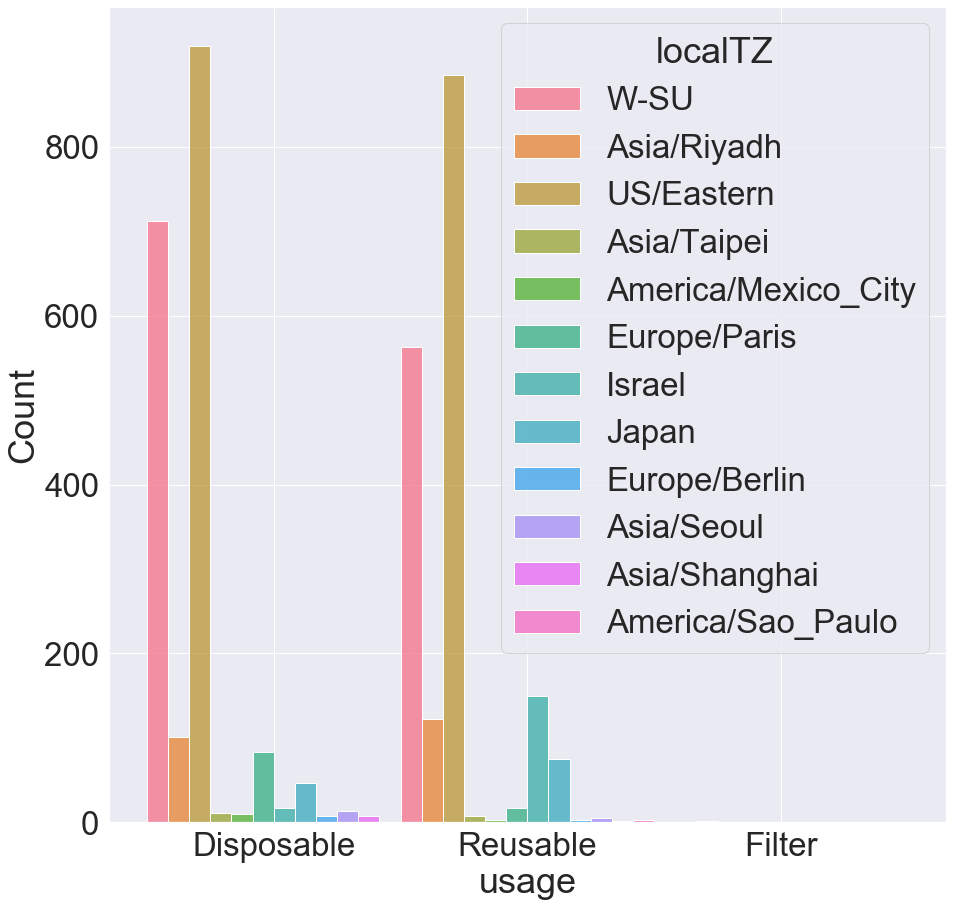

In [108]:
plt.figure(figsize=(15,15))
sns.set(font_scale = 3)
sns.histplot(data=df, x="usage", hue="localTZ", multiple='dodge', bins=12)

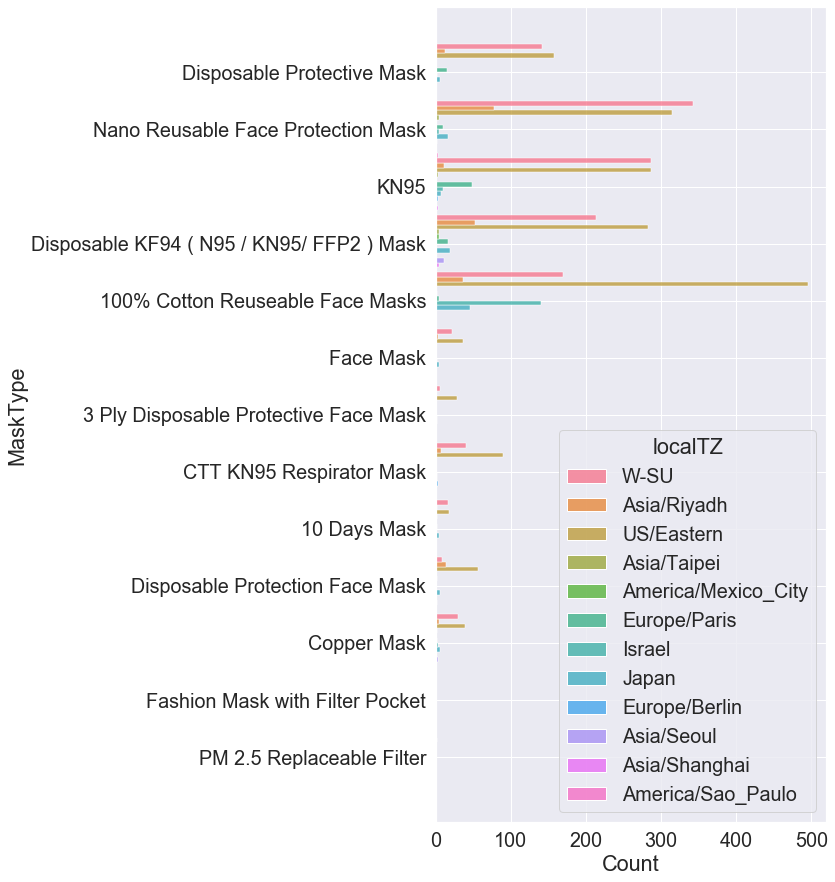

In [109]:
plt.figure(figsize=(7,15))
sns.set(font_scale = 1.8)
sns.histplot(data=df, y="MaskType", hue="localTZ", multiple='dodge')

#### Closer view of product distribution for each product

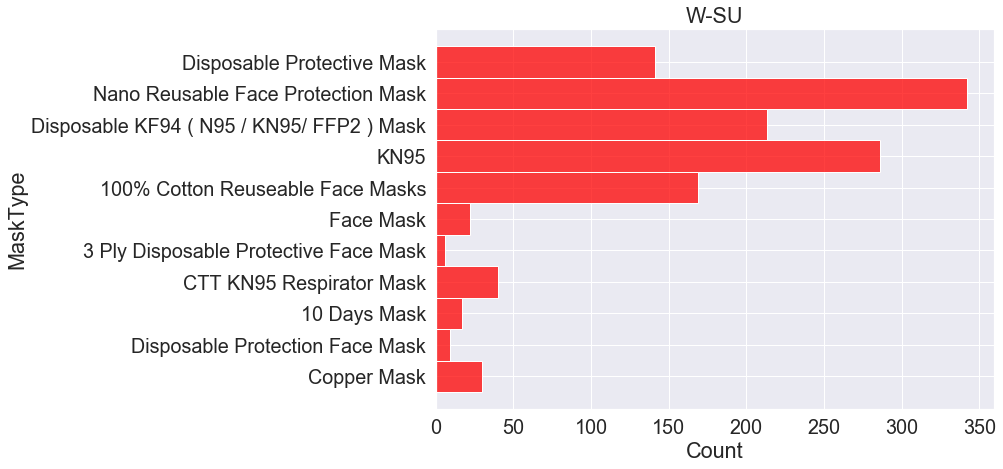

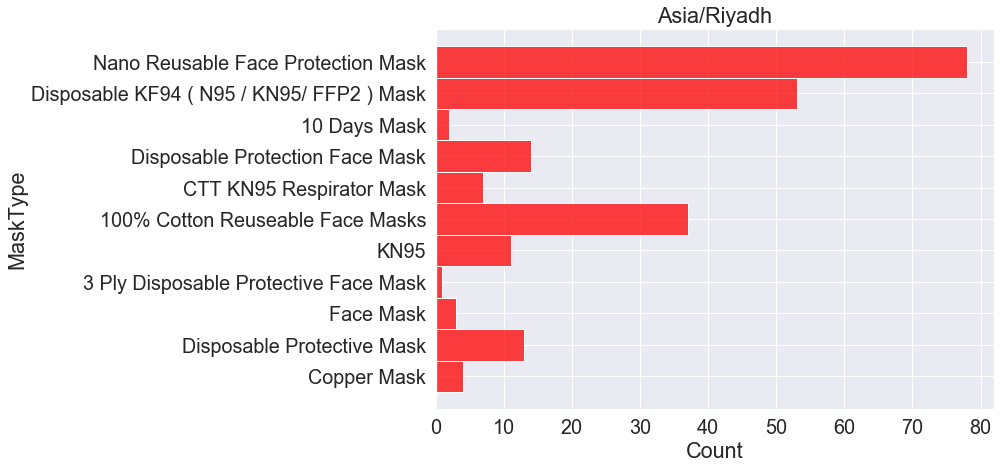

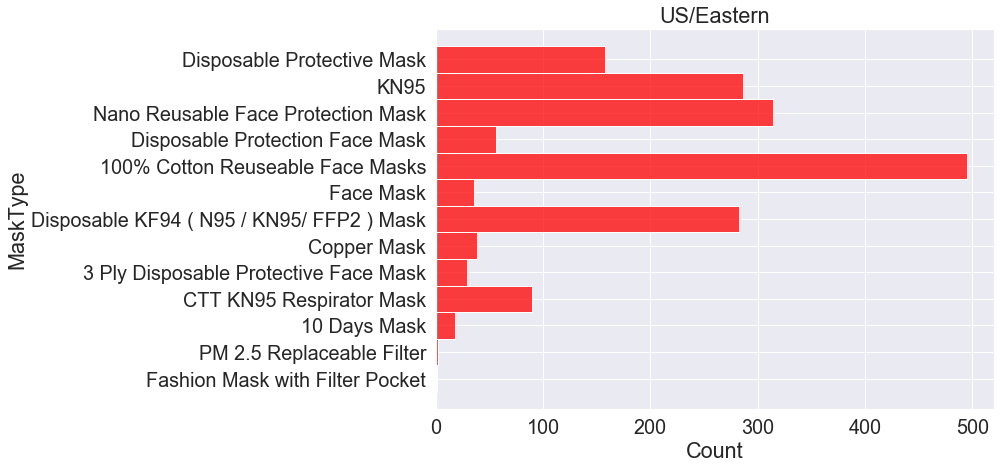

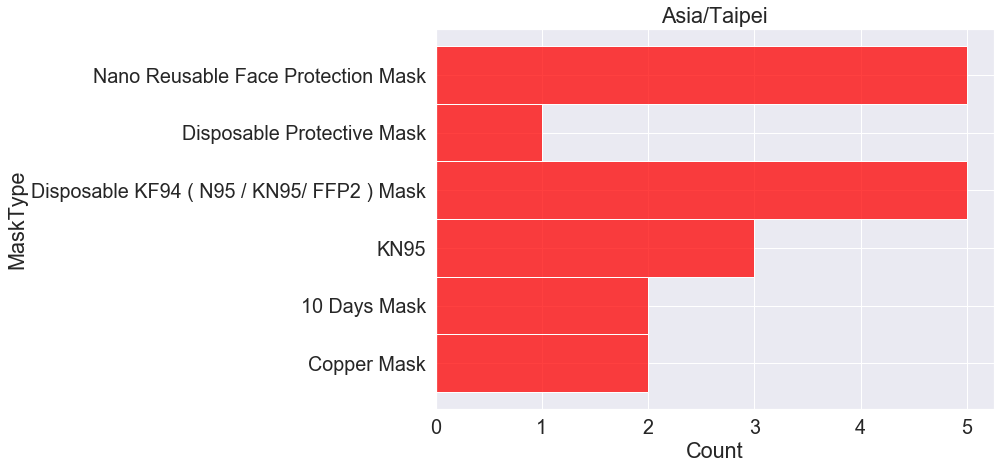

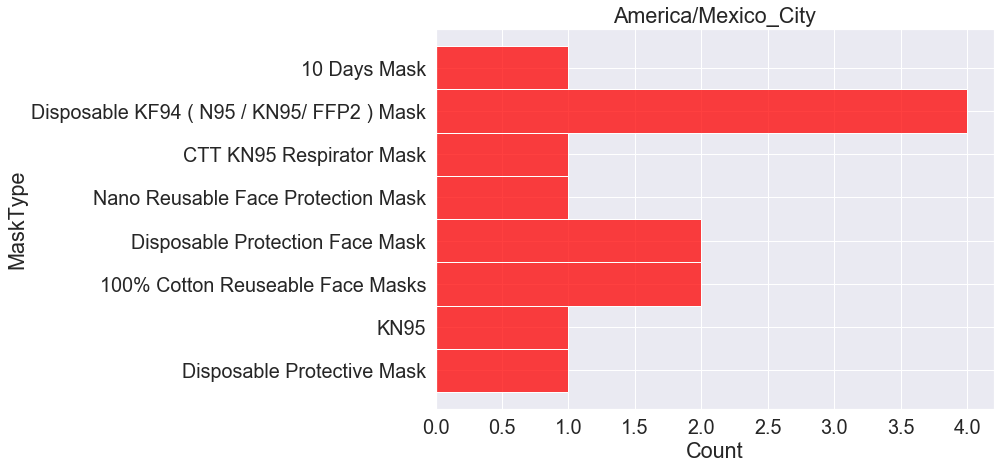

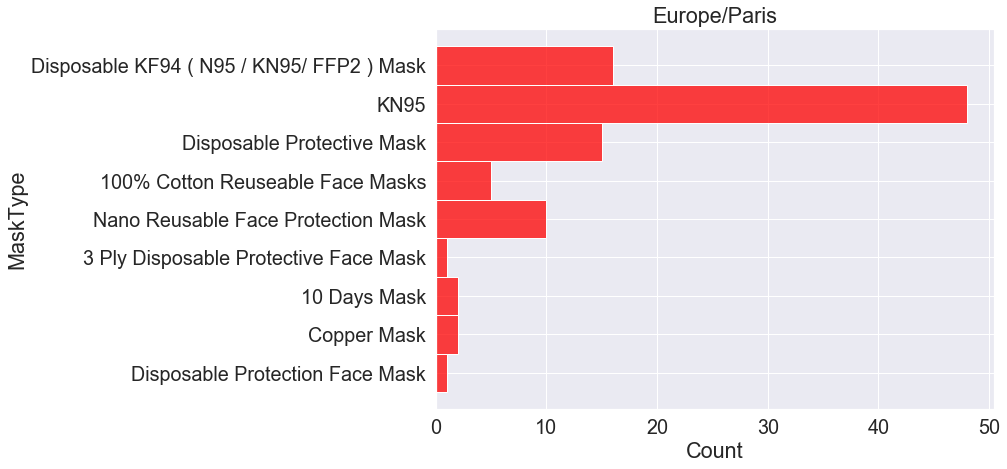

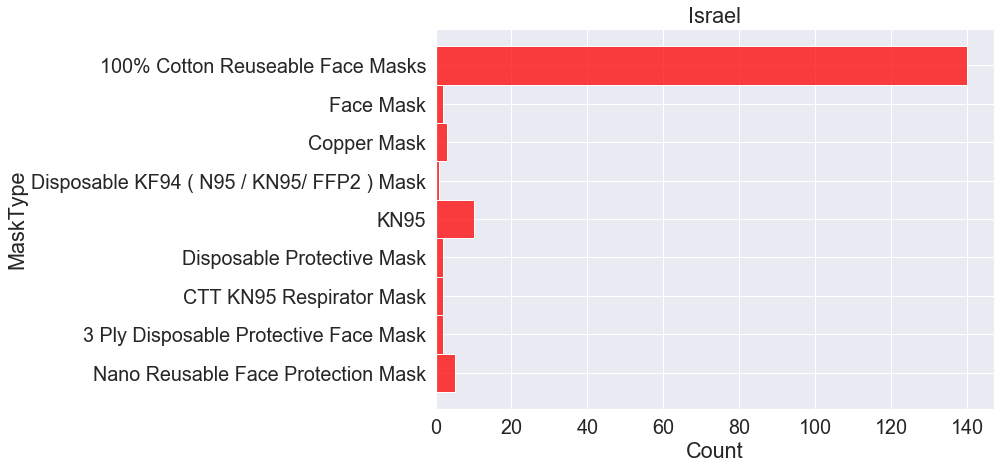

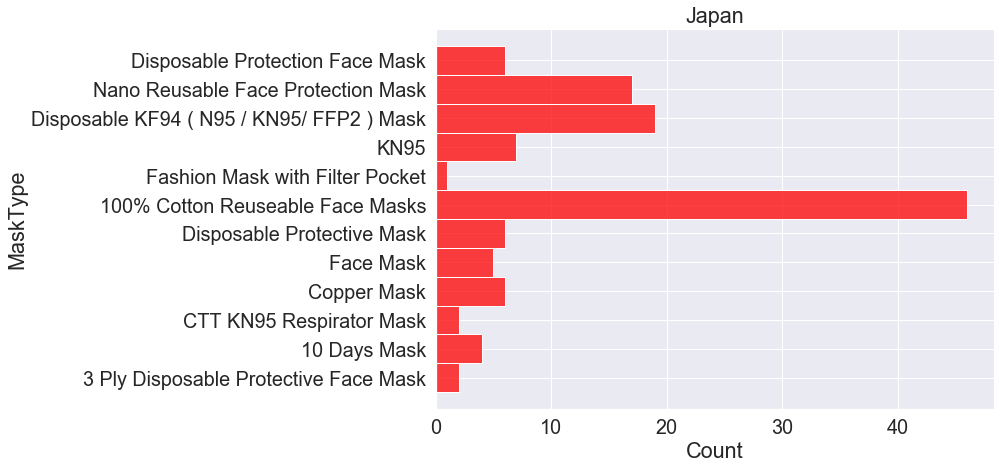

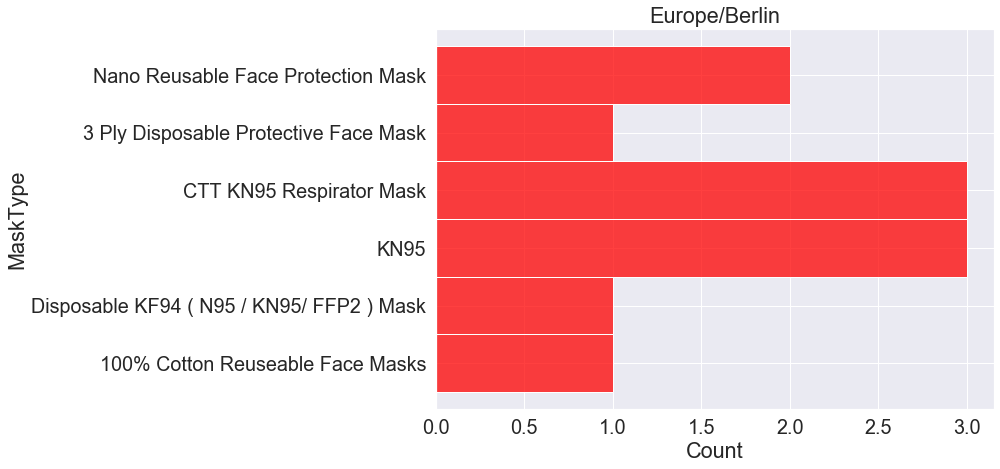

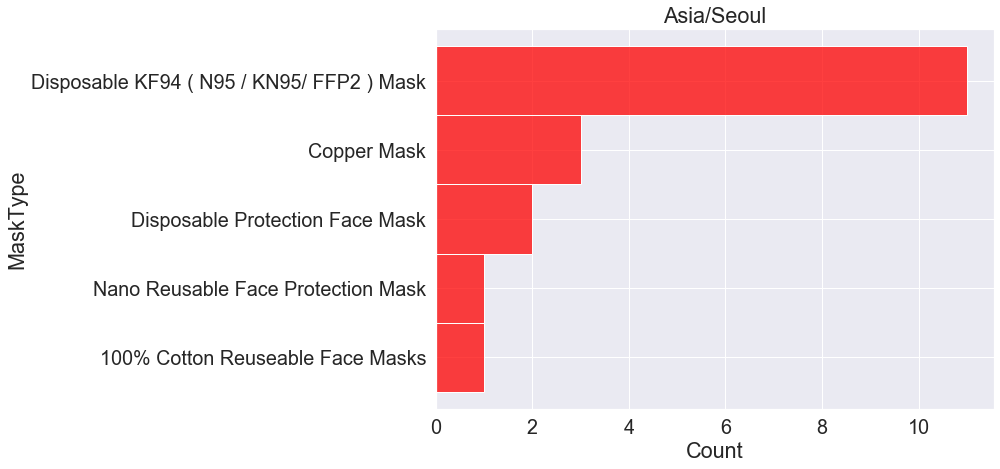

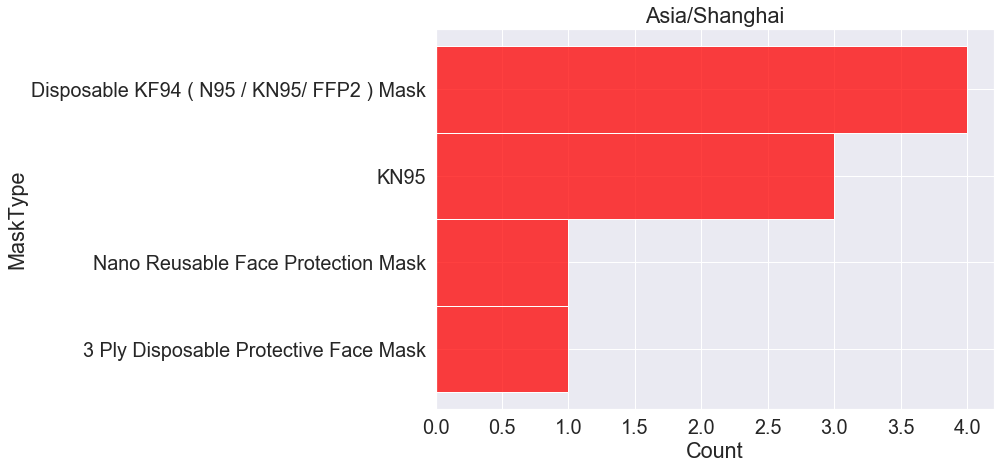

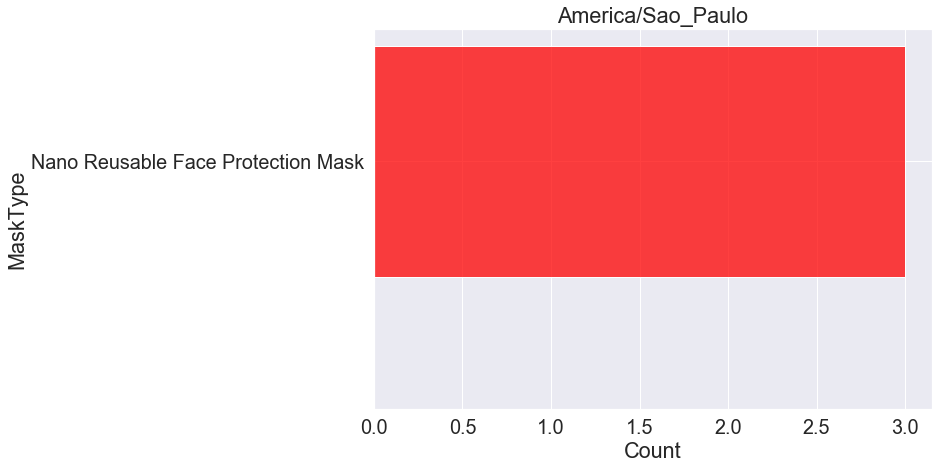

In [110]:
for location in range(12):
    plt.figure(figsize=(10,7))
    sns.set(font_scale = 1.8)
    
    sns.histplot(data=geo_df_list[location], y="MaskType", bins=14, color = 'red').set(title=location_array[location])
    plt.show()

In [111]:
geo_top_prod1 = geo_df1.loc[geo_df1['MaskType'] == 'Nano Reusable Face Protection Mask'] # Top Russia Product
geo_top_prod2 = geo_df2.loc[geo_df2['MaskType'] == 'Nano Reusable Face Protection Mask'] # Top Saudi Arabia Product
geo_top_prod3 = geo_df3.loc[geo_df3['MaskType'] == '100% Cotton Reuseable Face Masks']   # Top US product

geo_top_prod = pd.concat([geo_top_prod1,geo_top_prod2,geo_top_prod3], axis=0)

In [112]:
geo_top_prod.localTZ.unique()

array(['W-SU', 'Asia/Riyadh', 'US/Eastern'], dtype=object)

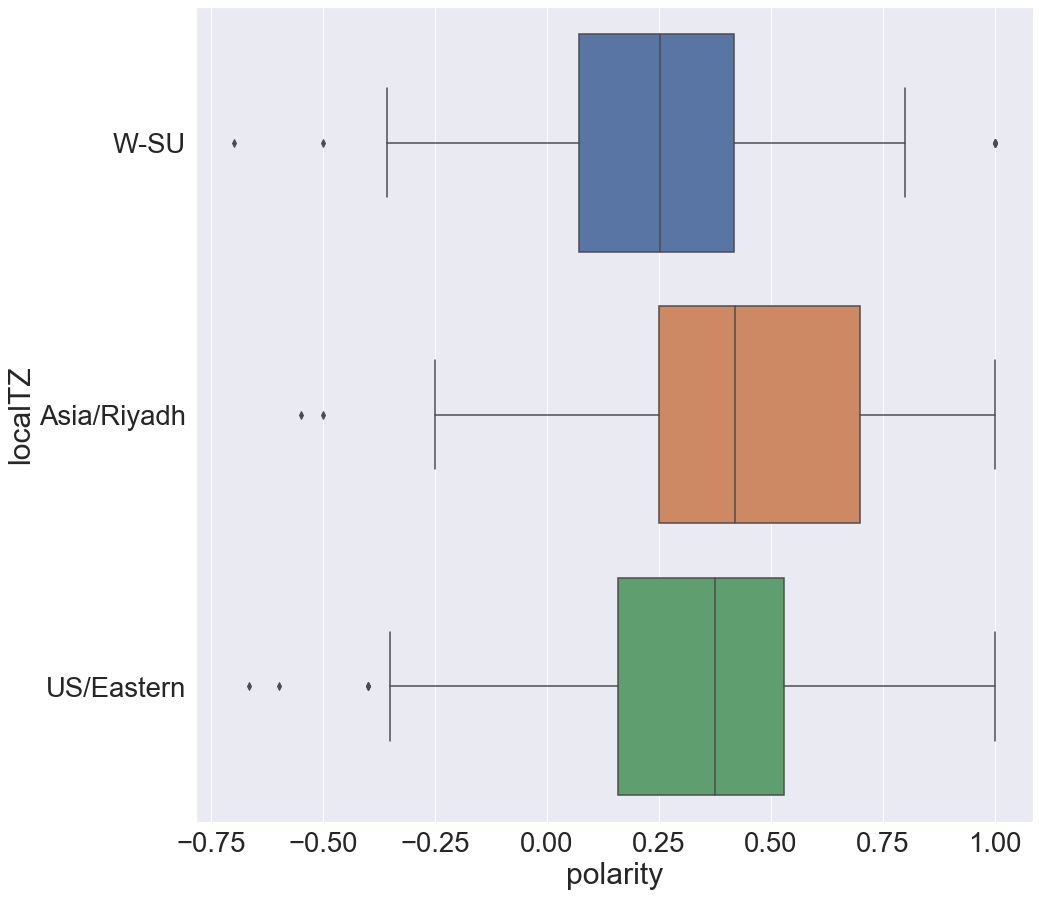

In [113]:
plt.figure(figsize=(15,15))
sns.set(font_scale = 2.5)
sns.boxplot(data=geo_top_prod, x="polarity", y = "localTZ")

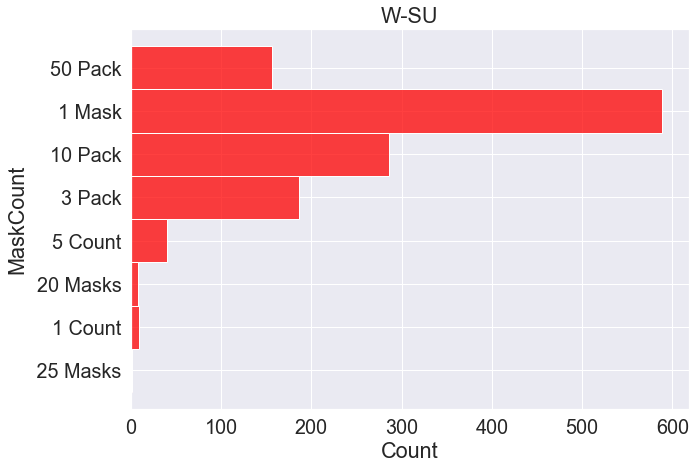

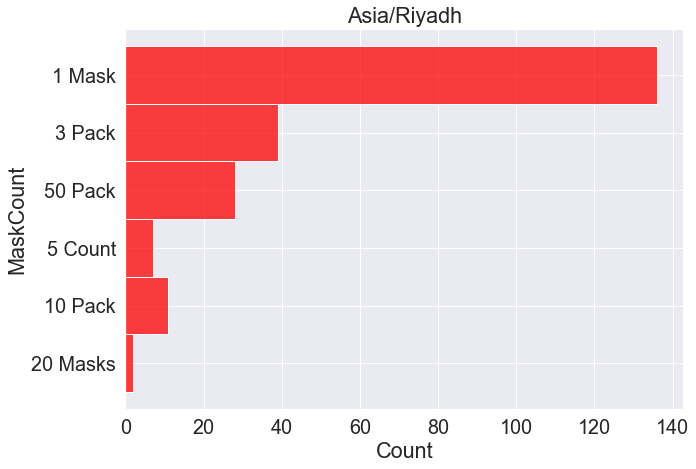

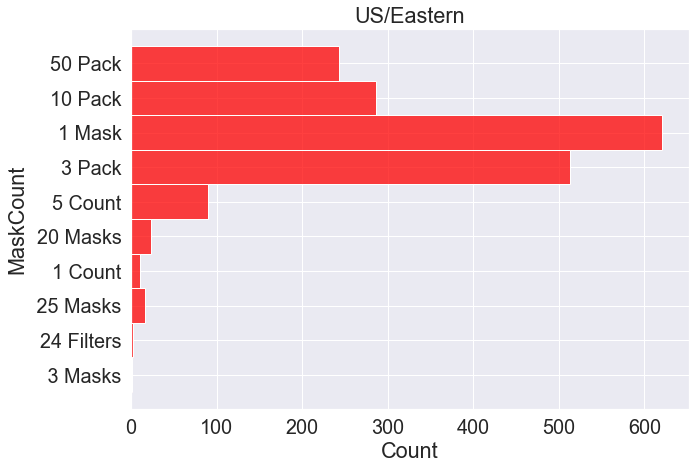

In [114]:
# Quantity of masks that people buy for top 3 Timezones
for location in range(3): # can adjust this for the rest of timezones
    plt.figure(figsize=(10,7))
    sns.set(font_scale = 1.8)
    
    sns.histplot(data=geo_df_list[location], y="MaskCount", bins=14, color = 'red').set(title=location_array[location])
    plt.show()

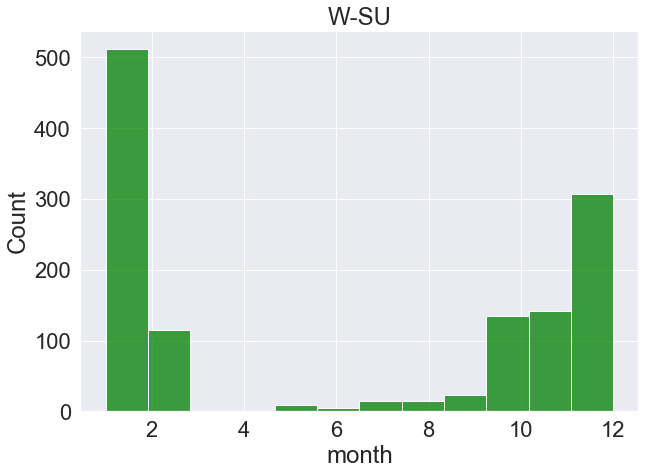

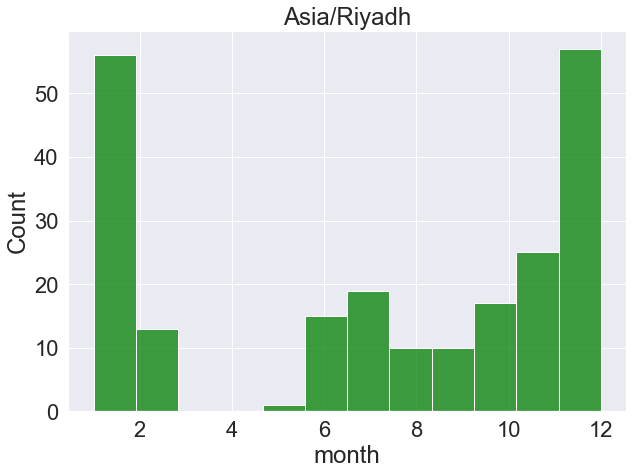

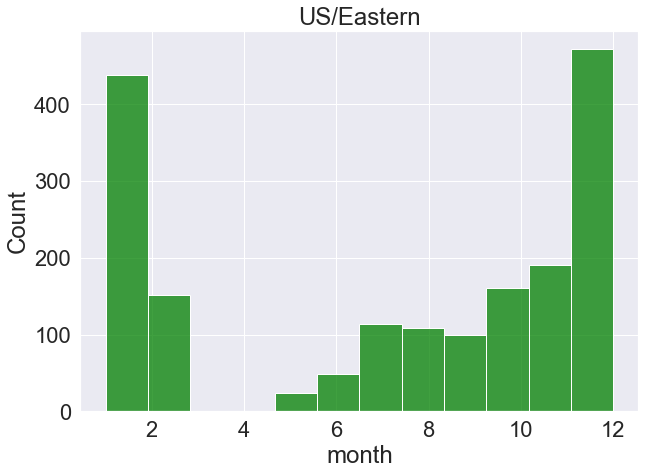

In [115]:
for location in range(3):
    plt.figure(figsize=(10,7))
    sns.set(font_scale = 2)
    
    sns.histplot(data=geo_df_list[location], x="month", bins=12, color = 'green').set(title=location_array[location])
    plt.show()

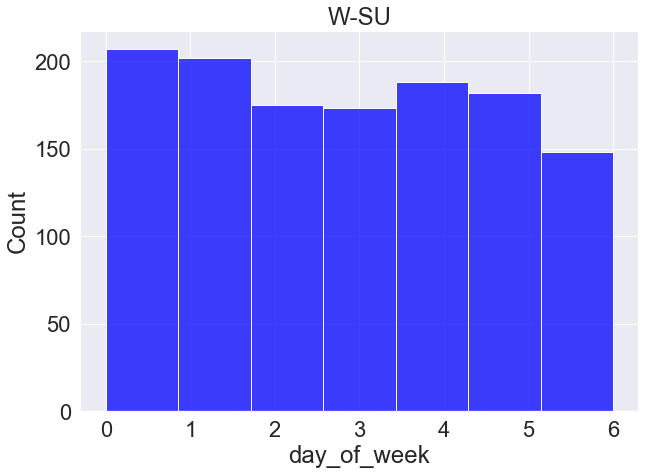

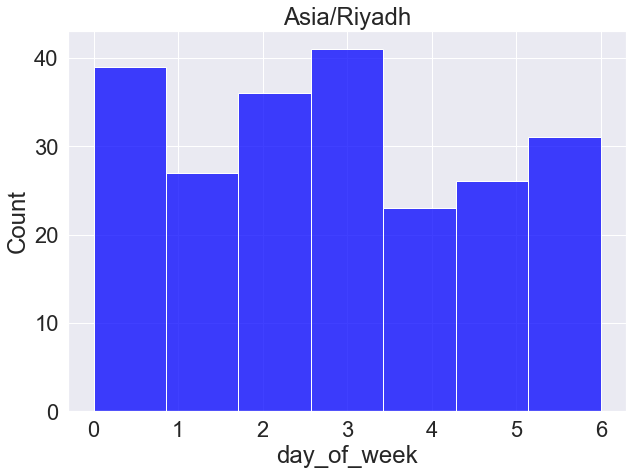

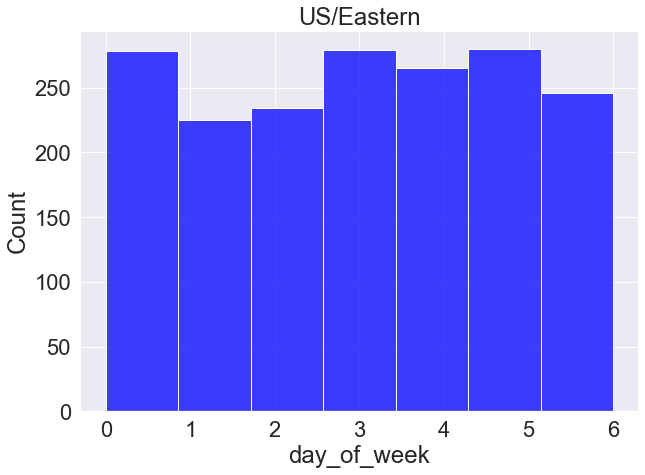

In [116]:
for location in range(3):
    plt.figure(figsize=(10,7))
    sns.set(font_scale = 2)
    
    sns.histplot(data=geo_df_list[location], x="day_of_week", bins=7, color = 'blue').set(title=location_array[location])
    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


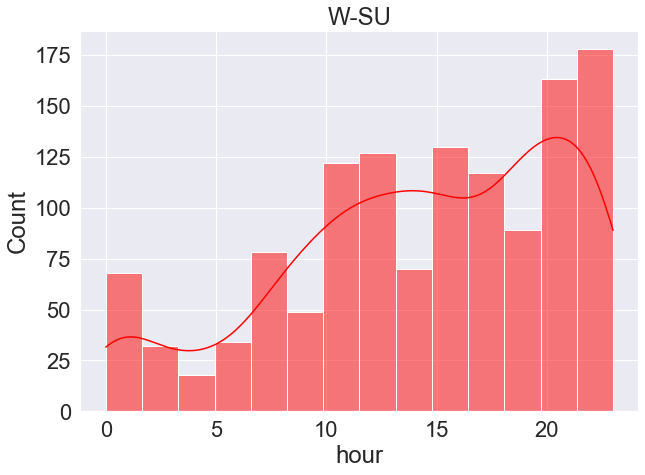

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


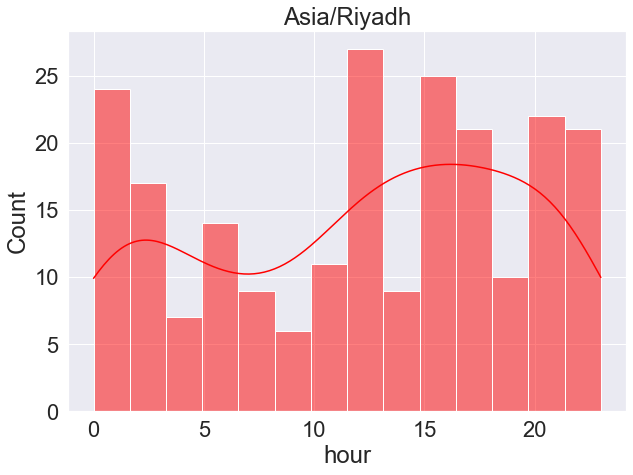

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


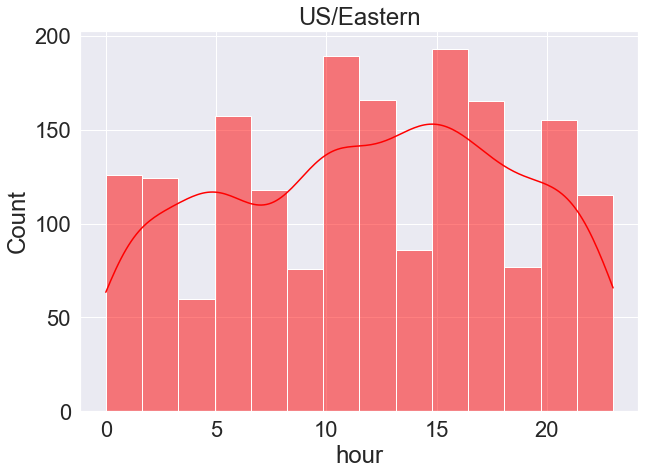

In [117]:
for location in range(3):
    plt.figure(figsize=(10,7))
    sns.set(font_scale = 2)
    
    sns.histplot(data=geo_df_list[location], x="hour", bins=14, color = 'red',kde = True).set(title=location_array[location])
    plt.show()

# Code Refrences

- https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
- https://textblob.readthedocs.io/en/dev/
- https://www.nicholasrenotte.com/how-to-build-a-sentiment-analyser-for-yelp-reviews-in-python/
- https://seaborn.pydata.org/

### Extra Plots

In [118]:
tea = df.loc[df['MaskType'] == '100% Cotton Reuseable Face Masks']

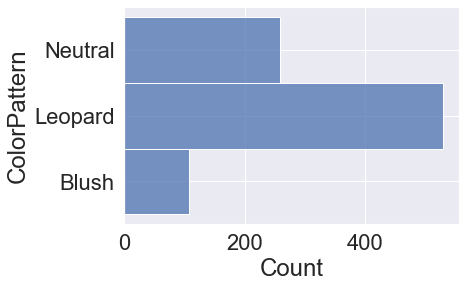

In [119]:
sns.histplot(data = tea, y='ColorPattern')

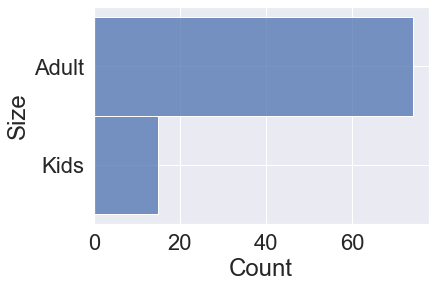

In [120]:
copper = df.loc[df['MaskType'] == 'Copper Mask']
sns.histplot(data = copper, y='Size')

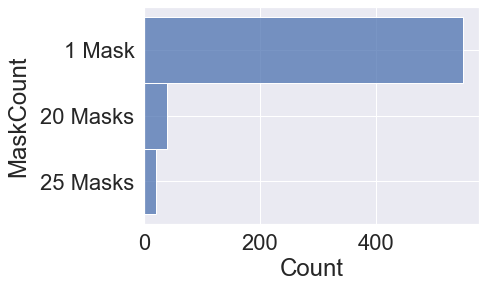

In [121]:
disp = df.loc[df['MaskType'] == 'Disposable KF94 ( N95 / KN95/ FFP2 ) Mask']
sns.histplot(data = disp, y='MaskCount')